In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import fitsio
import sys, os, time, argparse, glob
import warnings; warnings.simplefilter('ignore')
from astropy.table import Table

sys.path.insert(0, '/global/homes/q/qmxp55/DESI/BGS_paper/')
from main_def import get_sweep_patch, cut, cut_sweeps, get_random_patch, get_area, flux_to_mag
from geometric_def import query_catalog_mask, LSLGA_fit, LSLGA_veto, circular_mask_radii_func


# Geometric masking around bright sources

## Loading Tycho2 catalogue

In [2]:
ramin, ramax, decmin, decmax = 180, 200, 5, 15

#Loading Tycho2 catalogue
tycho_ = fitsio.read('/global/homes/q/qmxp55/DESI/matches/tycho2.fits')
#cutting out to the same footprint as DECaLS catalogue
tycho = cut(ramin, ramax, decmin, decmax, tycho_)
#tycho = Table(tycho)

## Loading GAIA DR2 sample catalogue

    (180 < RA < 200) & (5 < DEC < 15)

In [3]:
#Loading GAIA dr2 catalogue
gaia_ = fitsio.read('/global/homes/q/qmxp55/DESI/BGS_paper/gaia_dr2_180_200_5_15.fits', ext=1)
#cutting out to the same footprint as DECaLS catalogue
gaia = cut(ramin, ramax, decmin, decmax, gaia_)

## Sample catalogue #1

For this notebook we're going to use one of the output catalogues from the BGS pipeline that includes the masking column `CUTS`. More expecifications of the catalogue below:
    
    dr = dr7
    (180 < RA < 200) & (5 < DEC < 15)
    rmag < 20
    
    ----- CUTS column key -----
    0 = Bright Star: Kyle radii
    1 = Large Galaxy
    2 = NOBS
    3 = ALLMASK
    4 = Star-Galaxy separation
    5 = Fibre Magnitude Cut
    6 = Colour Cuts
    7= FRACS* 

In [4]:
path1 = '/global/homes/q/qmxp55/DESI/BGS_paper/dr7_180_200_5_15_rmag_20_N_2/kyle_Lkyle_Wkyle_D25_1_0_1_gaia_gal_2.9_-1_4_0.4_0.3_5_0/'
df1 = np.load(path1+'BGS_cat.npy')

In [5]:
df1_ran = np.load(path1+'randoms_cat.npy')

In [6]:
#ramin, ramax, decmin, decmax = 180, 200, 5, 15

In [7]:
bgs1 = df1['CUTS'] == '' #bgs targets
BS1_only = np.zeros(len(df1), dtype='?') #Objects rejected by Bright Stars only
#for i in set(df1['CUTS']):
    #if '0' in i:
BS1_only |= df1['CUTS'] == '0'


In [8]:
bgs1_ran = df1_ran['CUTS'] == '' #bgs targets
BS1_only_ran = np.zeros(len(df1_ran), dtype='?') #Objects rejected by Bright Stars only
#for i in set(df1_ran['CUTS']):
#    if '0' in i:
BS1_only_ran |= df1_ran['CUTS'] == '0'

In [13]:
#Masking objects near GAIA DR2...

MS1_ = query_catalog_mask(df1['RA'], df1['DEC'], gaia, Dustin_MS_radii, nameMag='Gmag', 
                         diff_spikes=False, length_radii=None, widht_radii=None, 
                             return_diagnostics=False, bestfit=False)

0.00 < Gmag < 0.50   0 TYCHO bright stars

0.50 < Gmag < 1.00   0 TYCHO bright stars

1.00 < Gmag < 1.50   0 TYCHO bright stars

1.50 < Gmag < 2.00   0 TYCHO bright stars

2.00 < Gmag < 2.50   1 TYCHO bright stars
1325 nearby objects
1325 objects masked

2.50 < Gmag < 3.00   0 TYCHO bright stars

3.00 < Gmag < 3.50   0 TYCHO bright stars

3.50 < Gmag < 4.00   2 TYCHO bright stars
936 nearby objects
926 objects masked

4.00 < Gmag < 4.50   0 TYCHO bright stars

4.50 < Gmag < 5.00   4 TYCHO bright stars
833 nearby objects
801 objects masked

5.00 < Gmag < 5.50   7 TYCHO bright stars
947 nearby objects
908 objects masked

5.50 < Gmag < 6.00   7 TYCHO bright stars
612 nearby objects
594 objects masked

6.00 < Gmag < 6.50   16 TYCHO bright stars
938 nearby objects
862 objects masked

6.50 < Gmag < 7.00   20 TYCHO bright stars
645 nearby objects
596 objects masked

7.00 < Gmag < 7.50   43 TYCHO bright stars
985 nearby objects
896 objects masked

7.50 < Gmag < 8.00   70 TYCHO bright stars
121

In [14]:
#Masking randoms near GAIA DR2...

MS1_ran = query_catalog_mask(df1_ran['RA'], df1_ran['DEC'], gaia, Dustin_MS_radii, nameMag='Gmag', 
                         diff_spikes=False, length_radii=None, widht_radii=None, 
                             return_diagnostics=False, bestfit=False)

0.00 < Gmag < 0.50   0 TYCHO bright stars

0.50 < Gmag < 1.00   0 TYCHO bright stars

1.00 < Gmag < 1.50   0 TYCHO bright stars

1.50 < Gmag < 2.00   0 TYCHO bright stars

2.00 < Gmag < 2.50   1 TYCHO bright stars
1020 nearby objects
1020 objects masked

2.50 < Gmag < 3.00   0 TYCHO bright stars

3.00 < Gmag < 3.50   0 TYCHO bright stars

3.50 < Gmag < 4.00   2 TYCHO bright stars
1306 nearby objects
1262 objects masked

4.00 < Gmag < 4.50   0 TYCHO bright stars

4.50 < Gmag < 5.00   4 TYCHO bright stars
1563 nearby objects
1351 objects masked

5.00 < Gmag < 5.50   7 TYCHO bright stars
2048 nearby objects
1815 objects masked

5.50 < Gmag < 6.00   7 TYCHO bright stars
1420 nearby objects
1288 objects masked

6.00 < Gmag < 6.50   16 TYCHO bright stars
2572 nearby objects
2197 objects masked

6.50 < Gmag < 7.00   20 TYCHO bright stars
2361 nearby objects
2023 objects masked

7.00 < Gmag < 7.50   43 TYCHO bright stars
3756 nearby objects
3203 objects masked

7.50 < Gmag < 8.00   70 TYCHO br

In [15]:
#GAIA in BGS...
gaia_in_bgs1 = (bgs1) & (df1['GAIA_PHOT_G_MEAN_MAG'] != 0)
print('bgs galaxies from GAIA: %d --> %2.3g %% of total GAIA objects in DR7' 
      %(np.sum(gaia_in_bgs1), 100*np.sum(gaia_in_bgs1)/np.sum((df1['GAIA_PHOT_G_MEAN_MAG'] != 0))))

#MS masking corrected (we recover the BGS removed by MS...)
MS1 = (MS1_) & (~gaia_in_bgs1)


bgs galaxies from GAIA: 20195 --> 5.11 % of total GAIA objects in DR7


In [16]:
gaiaInDR7 = (df1['GAIA_PHOT_G_MEAN_MAG'] != 0)

idx2, idx1, d2d, d_ra, d_dec = search_around(tycho['RA'], tycho['DEC'], df1['RA'], 
                                             df1['DEC'], search_radius=0.5)

tycho2InDR7 = np.zeros(len(df1), bool)
tycho2InDR7[idx1] = True

1761 nearby objects ~ 0.248159 %


In [17]:
rmag1 = flux_to_mag(df1['FLUX_R']/df1['MW_TRANSMISSION_R'])

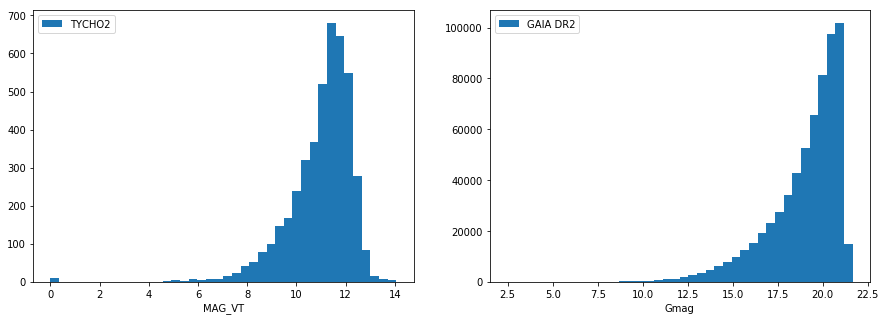

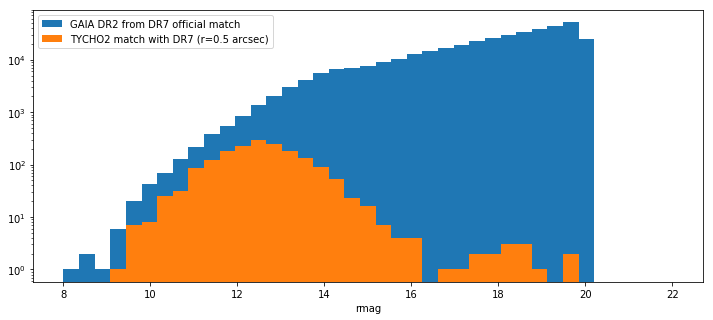

In [77]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.hist(tycho['MAG_VT'], 40, label='TYCHO2')
ax1.set_xlabel('MAG_VT')
ax1.legend()

ax2.hist(gaia['Gmag'], 40, label='GAIA DR2')
ax2.set_xlabel('Gmag')
ax2.legend()
plt.show()

fig = plt.figure(figsize=(12,5))

bins = np.linspace(8, 22, 40)
plt.hist(rmag1[gaiaInDR7], bins=bins, log=True, label='GAIA DR2 from DR7 official match')
plt.hist(rmag1[tycho2InDR7], bins=bins, log=True, label='TYCHO2 match with DR7 (r=0.5 arcsec)')
plt.xlabel('rmag')
plt.legend()

## Sample catalogue #2

For this notebook we're going to use one of the output catalogues from the BGS pipeline that includes the masking column `CUTS`. More expecifications of the catalogue below:
    
    dr = dr7
    (180 < RA < 200) & (5 < DEC < 15)
    rmag < 20
    
    ----- CUTS column key -----
    0 = Bright Star: Dustin radii
    1 = Large Galaxy
    2 = NOBS
    3 = ALLMASK
    4 = Star-Galaxy separation
    5 = Fibre Magnitude Cut
    6 = Colour Cuts
    7= FRACS* 

In [18]:
path2 = '/global/homes/q/qmxp55/DESI/BGS_paper/dr7_180_200_5_15_rmag_20_N_2/dustin___D25_1_0_1_gaia_gal_2.9_-1_4_0.4_0.3_5_0/'
df2 = np.load(path2+'BGS_cat.npy')

In [19]:
df2_ran = np.load(path2+'randoms_cat.npy')

In [20]:
#ramin, ramax, decmin, decmax = 180, 200, 5, 15

In [21]:
bgs2 = df2['CUTS'] == '' #bgs targets
BS2_only = np.zeros(len(df2), dtype='?') #Objects rejected by Bright Stars only
#for i in set(df2['CUTS']):
#    if '0' in i:
BS2_only |= df2['CUTS'] == '0'


In [22]:
bgs2_ran = df2_ran['CUTS'] == '' #bgs targets
BS2_only_ran = np.zeros(len(df2_ran), dtype='?') #Objects rejected by Bright Stars only
#for i in set(df2_ran['CUTS']):
#    if '0' in i:
BS2_only_ran |= df2_ran['CUTS'] == '0'

In [23]:
#Masking objects near GAIA DR2...

MS2_ = query_catalog_mask(df2['RA'], df2['DEC'], gaia, Dustin_MS_radii, nameMag='Gmag', 
                         diff_spikes=False, length_radii=None, widht_radii=None, 
                             return_diagnostics=False, bestfit=False)

0.00 < Gmag < 0.50   0 TYCHO bright stars

0.50 < Gmag < 1.00   0 TYCHO bright stars

1.00 < Gmag < 1.50   0 TYCHO bright stars

1.50 < Gmag < 2.00   0 TYCHO bright stars

2.00 < Gmag < 2.50   1 TYCHO bright stars
1325 nearby objects
1325 objects masked

2.50 < Gmag < 3.00   0 TYCHO bright stars

3.00 < Gmag < 3.50   0 TYCHO bright stars

3.50 < Gmag < 4.00   2 TYCHO bright stars
936 nearby objects
926 objects masked

4.00 < Gmag < 4.50   0 TYCHO bright stars

4.50 < Gmag < 5.00   4 TYCHO bright stars
833 nearby objects
801 objects masked

5.00 < Gmag < 5.50   7 TYCHO bright stars
947 nearby objects
908 objects masked

5.50 < Gmag < 6.00   7 TYCHO bright stars
612 nearby objects
594 objects masked

6.00 < Gmag < 6.50   16 TYCHO bright stars
938 nearby objects
862 objects masked

6.50 < Gmag < 7.00   20 TYCHO bright stars
645 nearby objects
596 objects masked

7.00 < Gmag < 7.50   43 TYCHO bright stars
985 nearby objects
896 objects masked

7.50 < Gmag < 8.00   70 TYCHO bright stars
121

In [24]:
#Masking randoms near GAIA DR2...

MS2_ran = query_catalog_mask(df2_ran['RA'], df2_ran['DEC'], gaia, Dustin_MS_radii, nameMag='Gmag', 
                         diff_spikes=False, length_radii=None, widht_radii=None, 
                             return_diagnostics=False, bestfit=False)

0.00 < Gmag < 0.50   0 TYCHO bright stars

0.50 < Gmag < 1.00   0 TYCHO bright stars

1.00 < Gmag < 1.50   0 TYCHO bright stars

1.50 < Gmag < 2.00   0 TYCHO bright stars

2.00 < Gmag < 2.50   1 TYCHO bright stars
1020 nearby objects
1020 objects masked

2.50 < Gmag < 3.00   0 TYCHO bright stars

3.00 < Gmag < 3.50   0 TYCHO bright stars

3.50 < Gmag < 4.00   2 TYCHO bright stars
1306 nearby objects
1262 objects masked

4.00 < Gmag < 4.50   0 TYCHO bright stars

4.50 < Gmag < 5.00   4 TYCHO bright stars
1563 nearby objects
1351 objects masked

5.00 < Gmag < 5.50   7 TYCHO bright stars
2048 nearby objects
1815 objects masked

5.50 < Gmag < 6.00   7 TYCHO bright stars
1420 nearby objects
1288 objects masked

6.00 < Gmag < 6.50   16 TYCHO bright stars
2572 nearby objects
2197 objects masked

6.50 < Gmag < 7.00   20 TYCHO bright stars
2361 nearby objects
2023 objects masked

7.00 < Gmag < 7.50   43 TYCHO bright stars
3756 nearby objects
3203 objects masked

7.50 < Gmag < 8.00   70 TYCHO br

In [25]:
#GAIA in BGS...
gaia_in_bgs2 = (bgs2) & (df2['GAIA_PHOT_G_MEAN_MAG'] != 0)
print('bgs galaxies from GAIA: %d --> %2.3g %% of total GAIA objects in DR7' 
      %(np.sum(gaia_in_bgs2), 100*np.sum(gaia_in_bgs2)/np.sum((df2['GAIA_PHOT_G_MEAN_MAG'] != 0))))

#MS masking corrected (we recover the BGS removed by MS...)
MS2 = (MS2_) & (~gaia_in_bgs2)


bgs galaxies from GAIA: 20031 --> 5.07 % of total GAIA objects in DR7


In [85]:
rmag2 = flux_to_mag(df2['FLUX_R']/df2['MW_TRANSMISSION_R'])

## Near Bright Stars masking

### Rongpu's 2D-stacks:BGS but near BS & Tycho2

In [26]:
limits = [190,195, 5, 10]

MAG_VT < 10.00
mag_mean 8.828451
15705 nearby objects ~ 5.67907 %
mag_radii MAX: 154.55913634776923 mag_radii MIN: 40.525125801829915
mag MAX: 9.999 mag MIN: 0.0
1204 of inf in density ratio out of a total of 7556
Minimum density ratio = -3, Maximum density ratio = 4.28565
----------------
10.00 < MAG_VT < 11.00
mag_mean 10.5487385
18527 nearby objects ~ 6.69952 %
mag_radii MAX: 40.46181710503181 mag_radii MIN: 29.078042031212362
mag MAX: 10.999 mag MIN: 10.004
764 of inf in density ratio out of a total of 7556
Minimum density ratio = -3, Maximum density ratio = 3.46228
----------------
11.00 < MAG_VT < 12.00
mag_mean 11.5166445
33967 nearby objects ~ 12.2828 %
mag_radii MAX: 29.047355831685575 mag_radii MIN: 20.072348979582006
mag MAX: 11.998 mag MIN: 11.002
100 of inf in density ratio out of a total of 7556
Minimum density ratio = -3, Maximum density ratio = 1.88734
----------------


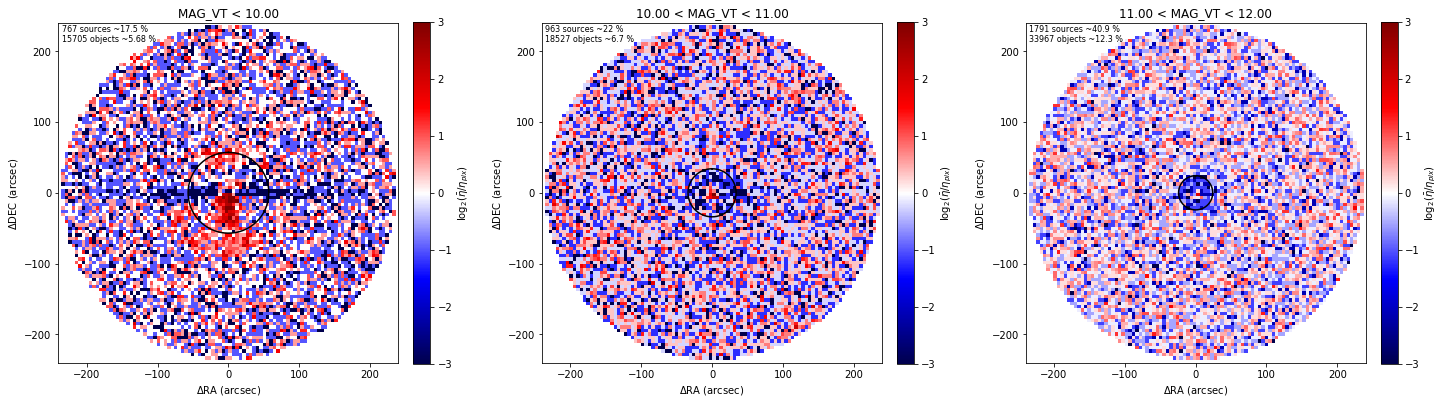

In [27]:
den_tycho_catr_0 = overdensity(df1[(bgs1) | (BS1_only)], tycho, kyle_radii, 'MAG_VT', 35, density=False, 
                            magbins=(10,12,3), radii_2=None, grid=[1,3], SR=[1., 240.], scaling=False, nbins=101, 
                               SR_scaling=5,logDenRat=[-3, 3], radii_bestfit=True)

In [131]:

eta_primary0, eta_secondary0, etaR_BS0, eta_bgs_BS0 = get_cross_corr(cat1=[df1['RA'], df1['DEC']], cat2=[tycho['RA'], tycho['DEC']], 
                            randoms=[df1_ran['RA'], df1_ran['DEC']], MASK=((bgs1) | (BS1_only)), MASK_ran=((bgs1_ran) | (BS1_only_ran)), 
                                            cat2_mag=tycho['MAG_VT'], limits=limits, mag_list=np.arange(6,15,2))
  

Area of 190 < RA < 195 & 5 < DEC < 10: 24.78 deg^2
D1D1 run time: 0.016506 sec
D1R run time: 0.516128 sec
D1D1 run time: 0.668673 sec
D1R run time: 11.373826 sec
D1D2 run time: 10.570461 sec
D2R run time: 134.151311 sec
D1D2 run time: 0.035816 sec
D2R run time: 0.398720 sec
D1D2 run time: 0.031332 sec
D2R run time: 0.367007 sec
D1D2 run time: 0.031412 sec
D2R run time: 0.529717 sec
D1D2 run time: 0.031355 sec
D2R run time: 0.381888 sec


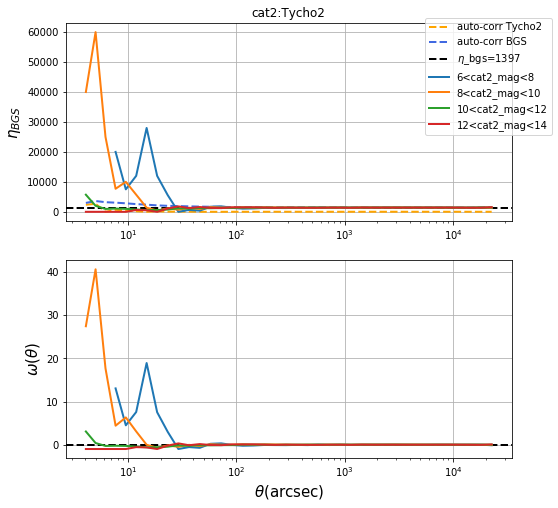

In [132]:
plot_cross_corr(cat1_name='BGS', cat2_name='Tycho2', eta_primary=eta_primary0, eta_secondary=eta_secondary0, 
                etaR=etaR_BS0, eta_bgs=eta_bgs_BS0)

### Rongpu's 2D-stacks:BGS & Tycho2

    Radii: Kyle
    Mask_on_diff_spikes: True
    

MAG_VT < 11.00
mag_mean 9.786292
31417 nearby objects ~ 11.4776 %
mag_radii MAX: 154.55913634776923 mag_radii MIN: 29.078042031212362
mag MAX: 10.999 mag MIN: 0.0
306 of inf in density ratio out of a total of 7556
Minimum density ratio = -3, Maximum density ratio = 1.99985
----------------
11.00 < MAG_VT < 11.50
mag_mean 11.262974
15773 nearby objects ~ 5.76235 %
mag_radii MAX: 29.047355831685575 mag_radii MIN: 24.276106526584616
mag MAX: 11.498 mag MIN: 11.002
1101 of inf in density ratio out of a total of 7556
Minimum density ratio = -3, Maximum density ratio = 1.99394
----------------
11.50 < MAG_VT < 12.00
mag_mean 11.739459
17541 nearby objects ~ 6.40826 %
mag_radii MAX: 24.24907104382379 mag_radii MIN: 20.072348979582006
mag MAX: 11.998 mag MIN: 11.501
861 of inf in density ratio out of a total of 7556
Minimum density ratio = -3, Maximum density ratio = 2.16259
----------------


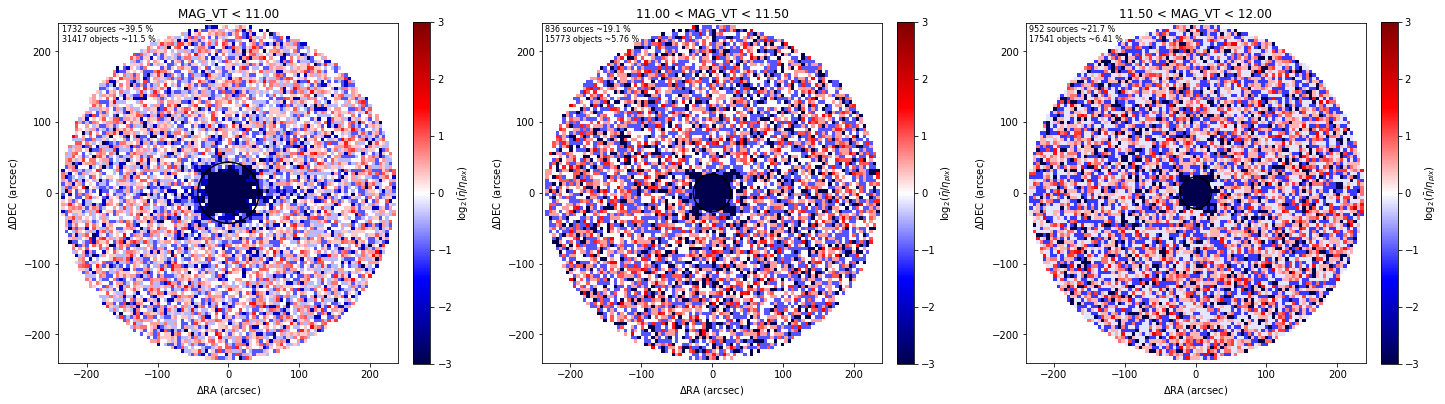

In [31]:
_ = overdensity(df1[bgs1], tycho, kyle_radii, 'MAG_VT', 35, density=False, 
                            magbins=(11,12,3), radii_2=None, grid=[1,3], SR=[2., 240.], scaling=False, nbins=101, 
                               SR_scaling=5,logDenRat=[-3, 3], radii_bestfit=True)

In [79]:

eta_primary1, eta_secondary1, etaR1, eta_bgs1 = get_cross_corr(cat1=[df1['RA'], df1['DEC']], cat2=[tycho['RA'], tycho['DEC']], 
                                randoms=[df1_ran['RA'], df1_ran['DEC']], MASK=bgs1, MASK_ran=bgs1_ran, cat2_mag=tycho['MAG_VT'], 
                                                    limits=limits, mag_list=np.arange(6,15,2))
  

Area of 190 < RA < 200 & 5 < DEC < 15: 98.36 deg^2
D1D1 run time: 0.004611 sec
D1R run time: 3.231283 sec
D1D1 run time: 7.099264 sec
D1R run time: 125.296693 sec
D1D2 run time: 130.753865 sec
D2R run time: 1771.916523 sec
D1D2 run time: 0.110972 sec
D2R run time: 1.304376 sec
D1D2 run time: 0.128014 sec
D2R run time: 1.548691 sec
D1D2 run time: 0.186816 sec
D2R run time: 2.593955 sec
D1D2 run time: 0.137343 sec
D2R run time: 1.628490 sec


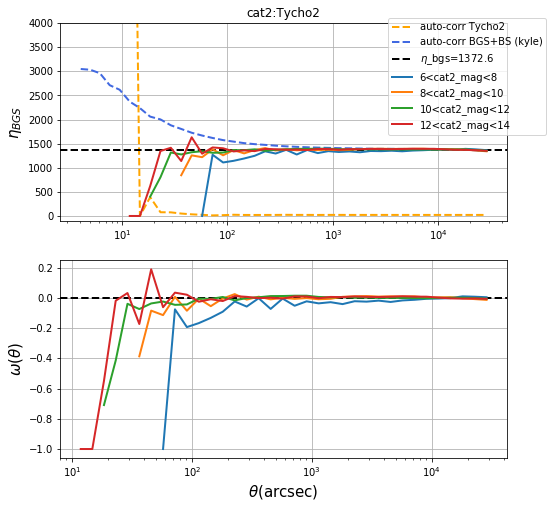

In [96]:
plot_cross_corr(cat1_name='BGS+BS (kyle)', cat2_name='Tycho2', eta_primary=eta_primary1, eta_secondary=eta_secondary1, etaR=etaR1, 
                eta_bgs=eta_bgs1, ylimU=(-100, 4000))

### Rongpu's 2D-stacks:BGS+BS & Tycho2 -- Same as DR8

    Radii: Dustin
    Mask_on_diff_spikes: False
    

MAG_VT < 10.00
12444 nearby objects ~ 4.57571 %
mag_radii MAX: 228.1026478726899 mag_radii MIN: 53.451585933453515
mag MAX: 9.999 mag MIN: 5.249
d2d min=0.999, d2d max=4.47
3089 of inf in density ratio out of a total of 7556
Minimum density ratio = -3, Maximum density ratio = 2.92101
----------------
10.00 < MAG_VT < 11.00
17662 nearby objects ~ 6.49439 %
mag_radii MAX: 53.372566107901974 mag_radii MIN: 39.40443427247893
mag MAX: 10.999 mag MIN: 10.004
d2d min= 1, d2d max=6.09
1253 of inf in density ratio out of a total of 7556
Minimum density ratio = -3, Maximum density ratio = 2.20864
----------------
11.00 < MAG_VT < 12.00
33105 nearby objects ~ 12.1728 %
mag_radii MAX: 39.36839270819714 mag_radii MIN: 29.029909009717873
mag MAX: 11.998 mag MIN: 11.002
d2d min= 1, d2d max=8.25
1173 of inf in density ratio out of a total of 7556
Minimum density ratio = -3, Maximum density ratio = 2.2777
----------------


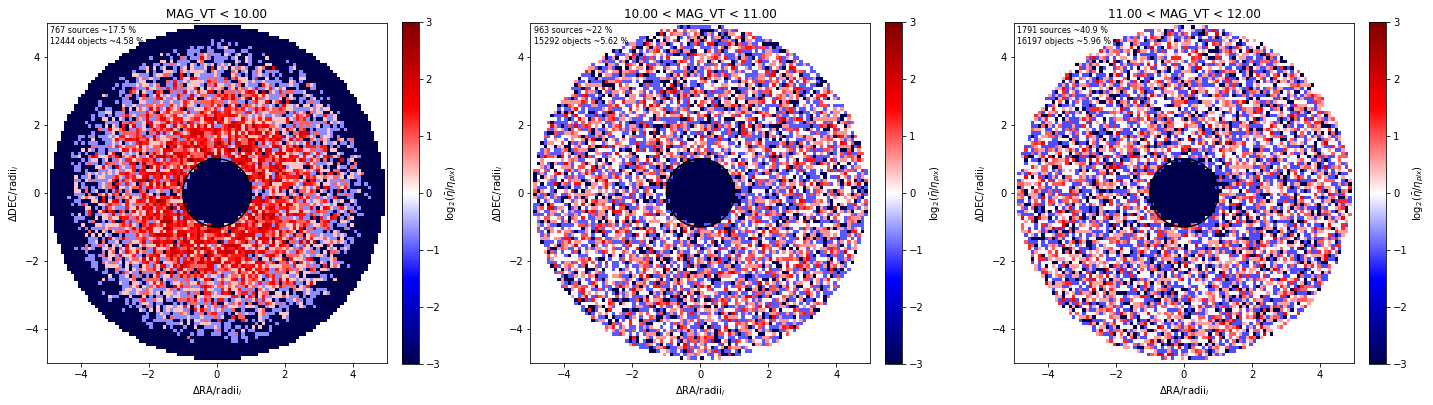

In [118]:
_ = overdensity(df2[bgs2], tycho, Dustin_MS_radii, 'MAG_VT', 35, density=False, 
                            magbins=(10,12,3), radii_2=None, grid=[1,3], SR=[2., 240.], scaling=True, nbins=101, 
                               SR_scaling=5,logDenRat=[-3, 3], radii_bestfit=False)

In [86]:

eta_primary2, eta_secondary2, etaR2, eta_bgs2 = get_cross_corr(cat1=[df2['RA'], df2['DEC']], cat2=[tycho['RA'], tycho['DEC']], 
                            randoms=[df2_ran['RA'], df2_ran['DEC']], MASK=bgs2, MASK_ran=bgs2_ran, cat2_mag=tycho['MAG_VT'], 
                                                               limits=limits, mag_list=np.arange(6,15,2))
  

Area of 190 < RA < 200 & 5 < DEC < 15: 98.36 deg^2
D1D1 run time: 0.006425 sec
D1R run time: 3.257775 sec
D1D1 run time: 7.151653 sec
D1R run time: 130.675067 sec
D1D2 run time: 128.645341 sec
D2R run time: 1712.511415 sec
D1D2 run time: 0.113397 sec
D2R run time: 1.331118 sec
D1D2 run time: 0.124621 sec
D2R run time: 1.690200 sec
D1D2 run time: 0.201410 sec
D2R run time: 2.531268 sec
D1D2 run time: 0.136267 sec
D2R run time: 1.671753 sec


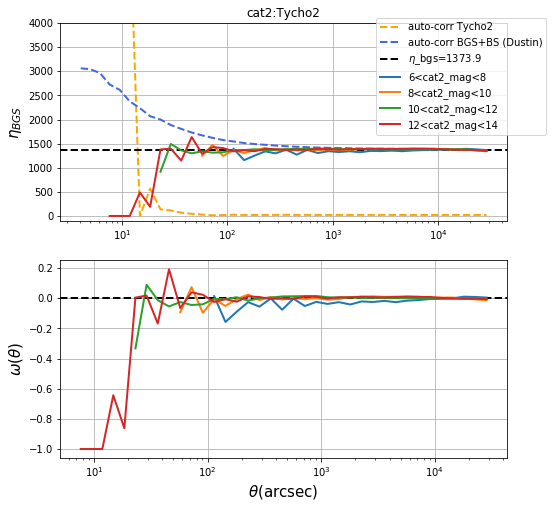

In [97]:
plot_cross_corr(cat1_name='BGS+BS (Dustin)', cat2_name='Tycho2', eta_primary=eta_primary2, eta_secondary=eta_secondary2, 
                etaR=etaR2, eta_bgs=eta_bgs2, ylimU=(-100, 4000))

## Near Medium Stars masking

In [150]:
limits = [190,200, 5, 15]

### Rongpu's 2D-stacks:BGS & GAIA DR2, BS-radii:kyle

Gmag < 17.00
26742 nearby objects ~ 9.76966 %
mag_radii MAX: 44.59836820051648 mag_radii MIN: 6.295403620095263
mag MAX: 16.9999 mag MIN: 10.5934
d2d min=1.56e-11, d2d max=4.74
972 of inf in density ratio out of a total of 7556
Minimum density ratio = -2, Maximum density ratio = 2.61767
----------------
17.00 < Gmag < 18.00
16641 nearby objects ~ 6.07946 %
mag_radii MAX: 6.2949995549363 mag_radii MIN: 4.636641607242973
mag MAX: 17.9999 mag MIN: 17.0001
d2d min=2.45e-12, d2d max=6.45
2586 of inf in density ratio out of a total of 7556
Minimum density ratio = -2, Maximum density ratio = 2.45087
----------------
18.00 < Gmag < 19.00
28374 nearby objects ~ 10.3659 %
mag_radii MAX: 4.636373823343305 mag_radii MIN: 3.4206046014091123
mag MAX: 18.9999 mag MIN: 18.0001
d2d min= 0, d2d max=8.76
2963 of inf in density ratio out of a total of 7556
Minimum density ratio = -2, Maximum density ratio = 2.41287
----------------


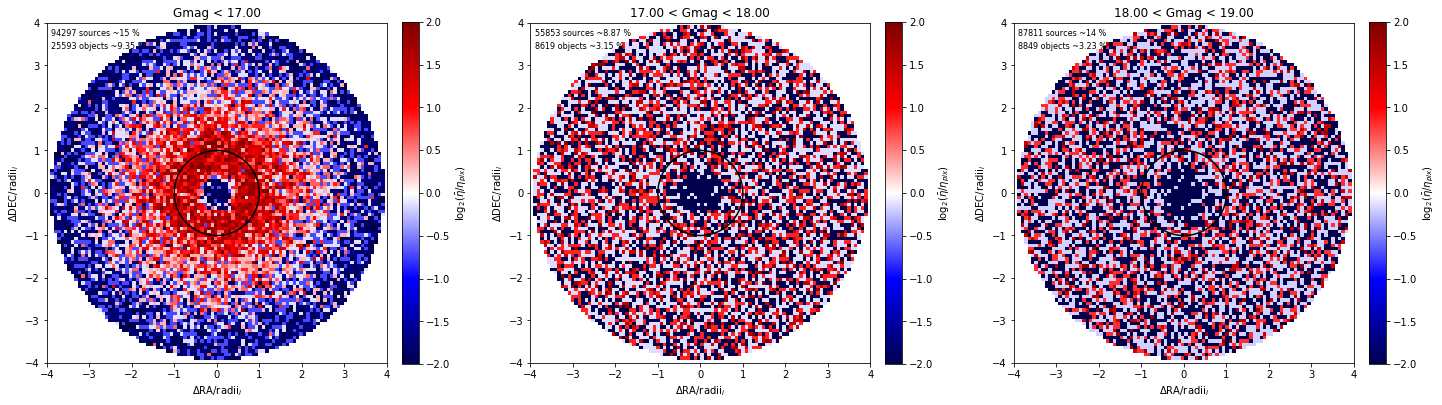

In [127]:
_ = overdensity(df1[bgs1], gaia, Dustin_MS_radii, 'Gmag', 35, density=False, 
                            magbins=(17, 19, 3), radii_2=None, grid=[1,3], SR=[1, 30.], scaling=True, nbins=101, 
                               SR_scaling=4, logDenRat=[-2, 2], radii_bestfit=False)

In [151]:

eta_primary3, eta_secondary3, etaR_MS3, eta_bgs_MS3 = get_cross_corr(cat1=[df1['RA'], df1['DEC']], cat2=[gaia['RA']*1, gaia['DEC']*1], 
                            randoms=[df1_ran['RA'], df1_ran['DEC']], MASK=(bgs1), MASK_ran=(bgs1_ran), 
                                            cat2_mag=gaia['Gmag'], limits=limits, mag_list=np.arange(13,22,2))
  

Area of 190 < RA < 200 & 5 < DEC < 15: 98.36 deg^2
D1D1 run time: 43.712612 sec
D1R run time: 380.900554 sec
D1D1 run time: 8.651428 sec
D1R run time: 174.598573 sec
D1D2 run time: 130.788446 sec
D2R run time: 1863.570242 sec
D1D2 run time: 1.016024 sec
D2R run time: 13.289030 sec
D1D2 run time: 2.409555 sec
D2R run time: 31.884390 sec
D1D2 run time: 5.685114 sec
D2R run time: 80.410429 sec
D1D2 run time: 15.409782 sec
D2R run time: 216.417994 sec


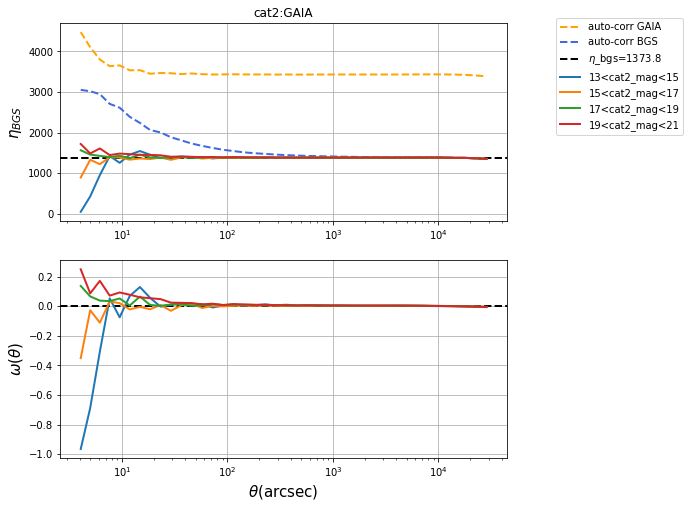

In [155]:
plot_cross_corr(cat1_name='BGS', cat2_name='GAIA', eta_primary=eta_primary3, eta_secondary=eta_secondary3, 
                etaR=etaR_MS3, eta_bgs=eta_bgs_MS3)

### Rongpu's 2D-stacks:BGS & GAIA DR2, BS-radii:dustin

Gmag < 17.00
26406 nearby objects ~ 9.70959 %
mag_radii MAX: 39.11251798487057 mag_radii MIN: 6.295403620095263
mag MAX: 16.9999 mag MIN: 11.0233
d2d min=1.56e-11, d2d max=4.73
982 of inf in density ratio out of a total of 7556
Minimum density ratio = -2, Maximum density ratio = 2.63611
----------------
17.00 < Gmag < 18.00
16536 nearby objects ~ 6.08035 %
mag_radii MAX: 6.2949995549363 mag_radii MIN: 4.636641607242973
mag MAX: 17.9999 mag MIN: 17.0001
d2d min=2.45e-12, d2d max=6.45
2607 of inf in density ratio out of a total of 7556
Minimum density ratio = -2, Maximum density ratio = 2.45993
----------------
18.00 < Gmag < 19.00
28190 nearby objects ~ 10.3656 %
mag_radii MAX: 4.636373823343305 mag_radii MIN: 3.4206046014091123
mag MAX: 18.9999 mag MIN: 18.0001
d2d min= 0, d2d max=8.76
2983 of inf in density ratio out of a total of 7556
Minimum density ratio = -2, Maximum density ratio = 2.42269
----------------


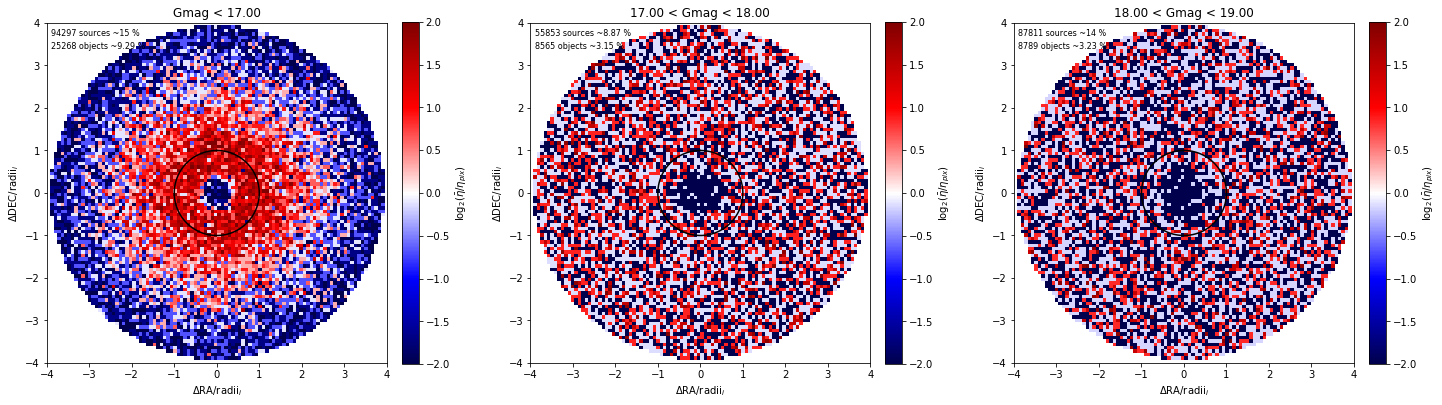

In [128]:
_ = overdensity(df2[bgs2], gaia, Dustin_MS_radii, 'Gmag', 35, density=False, 
                            magbins=(17, 19, 3), radii_2=None, grid=[1,3], SR=[1, 30.], scaling=True, nbins=101, 
                               SR_scaling=4, logDenRat=[-2, 2], radii_bestfit=False)

In [152]:
eta_primary4, eta_secondary4, etaR_MS4, eta_bgs_MS4 = get_cross_corr(cat1=[df2['RA'], df2['DEC']], cat2=[gaia['RA']*1, gaia['DEC']*1], 
                            randoms=[df2_ran['RA'], df2_ran['DEC']], MASK=(bgs2), MASK_ran=(bgs2_ran), 
                                            cat2_mag=gaia['Gmag'], limits=limits, mag_list=np.arange(13,22,2))
  

Area of 190 < RA < 200 & 5 < DEC < 15: 98.36 deg^2
D1D1 run time: 50.467854 sec
D1R run time: 366.617566 sec
D1D1 run time: 7.216234 sec
D1R run time: 137.302934 sec
D1D2 run time: 137.296613 sec
D2R run time: 1965.441987 sec
D1D2 run time: 1.243429 sec
D2R run time: 13.543588 sec
D1D2 run time: 2.445689 sec
D2R run time: 31.994877 sec
D1D2 run time: 5.698833 sec
D2R run time: 74.015529 sec
D1D2 run time: 13.092649 sec
D2R run time: 169.296534 sec


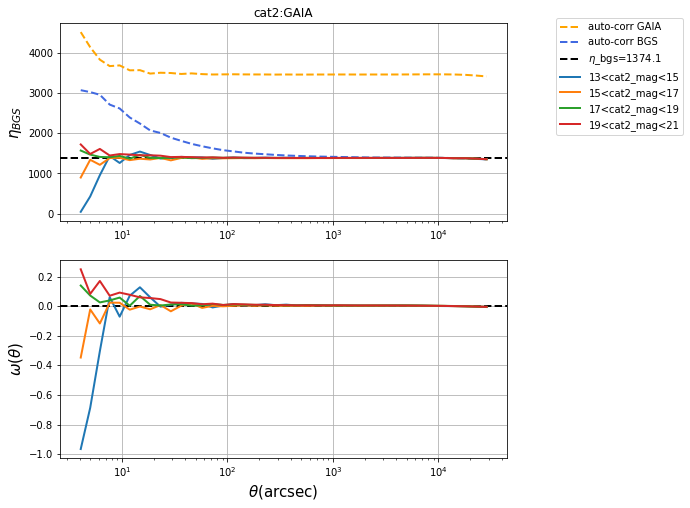

In [156]:
plot_cross_corr(cat1_name='BGS', cat2_name='GAIA', eta_primary=eta_primary4, eta_secondary=eta_secondary4, 
                etaR=etaR_MS4, eta_bgs=eta_bgs_MS4)

### Rongpu's 2D-stacks:BGS+MS & GAIA DR2, BS-radii:kyle

Gmag < 17.00
22725 nearby objects ~ 8.48562 %
mag_radii MAX: 41.26881846670361 mag_radii MIN: 6.295403620095263
mag MAX: 16.9999 mag MIN: 10.8438
d2d min=1.56e-11, d2d max=4.73
1225 of inf in density ratio out of a total of 7556
Minimum density ratio = -2, Maximum density ratio = 2.86213
----------------
17.00 < Gmag < 18.00
15867 nearby objects ~ 5.92481 %
mag_radii MAX: 6.2949995549363 mag_radii MIN: 4.636641607242973
mag MAX: 17.9999 mag MIN: 17.0001
d2d min=2.45e-12, d2d max=6.45
2864 of inf in density ratio out of a total of 7556
Minimum density ratio = -2, Maximum density ratio = 2.55101
----------------
18.00 < Gmag < 19.00
27452 nearby objects ~ 10.2507 %
mag_radii MAX: 4.636373823343305 mag_radii MIN: 3.4206046014091123
mag MAX: 18.9999 mag MIN: 18.0001
d2d min= 0, d2d max=8.76
3223 of inf in density ratio out of a total of 7556
Minimum density ratio = -2, Maximum density ratio = 2.49178
----------------


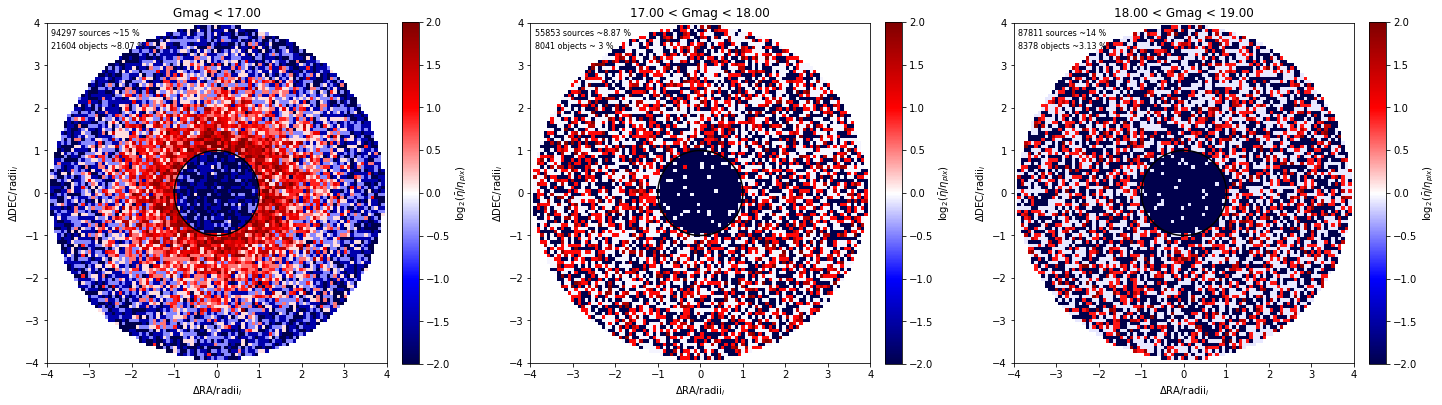

In [142]:
_ = overdensity(df1[(bgs1) & (~MS1)], gaia, Dustin_MS_radii, 'Gmag', 35, density=False, 
                            magbins=(17, 19, 3), radii_2=None, grid=[1,3], SR=[1, 30.], scaling=True, nbins=101, 
                               SR_scaling=4, logDenRat=[-2, 2], radii_bestfit=False)

In [153]:

eta_primary5, eta_secondary5, etaR_MS5, eta_bgs_MS5 = get_cross_corr(cat1=[df1['RA'], df1['DEC']], cat2=[gaia['RA']*1, gaia['DEC']*1], 
                            randoms=[df1_ran['RA'], df1_ran['DEC']], MASK=((bgs1) & (~MS1)), MASK_ran=((bgs1_ran) & (~MS1_ran)), 
                                            cat2_mag=gaia['Gmag'], limits=limits, mag_list=np.arange(13,22,2))
  

Area of 190 < RA < 200 & 5 < DEC < 15: 98.36 deg^2
D1D1 run time: 44.354489 sec
D1R run time: 306.755781 sec
D1D1 run time: 7.371505 sec
D1R run time: 130.934158 sec
D1D2 run time: 130.456012 sec
D2R run time: 2137.074436 sec
D1D2 run time: 2.491755 sec
D2R run time: 20.579468 sec
D1D2 run time: 3.093821 sec
D2R run time: 52.970401 sec
D1D2 run time: 9.493545 sec
D2R run time: 113.358535 sec
D1D2 run time: 18.262853 sec
D2R run time: 244.902146 sec


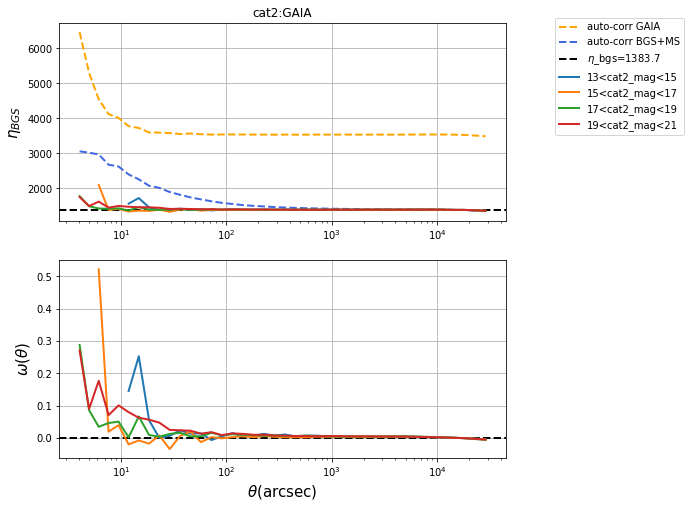

In [157]:
plot_cross_corr(cat1_name='BGS+MS', cat2_name='GAIA', eta_primary=eta_primary5, eta_secondary=eta_secondary5, 
                etaR=etaR_MS5, eta_bgs=eta_bgs_MS5)

### Rongpu's 2D-stacks:BGS+MS & GAIA DR2, BS-radii:Dustin

Gmag < 16.00
3105 nearby objects ~ 64.1662 %
mag_radii MAX: 38.6308040610739 mag_radii MIN: 8.557988030163497
mag MAX: 15.9981 mag MIN: 11.0634
d2d min=0.0255, d2d max=3.36
4839 4839 4839
6818 of inf in density ratio out of a total of 7556
Minimum density ratio = -2, Maximum density ratio = 5.24572
----------------
16.00 < Gmag < 17.00
661 nearby objects ~ 13.6598 %
mag_radii MAX: 8.538851411606036 mag_radii MIN: 6.298434108787493
mag MAX: 16.9984 mag MIN: 16.0053
d2d min=0.0384, d2d max=4.61
4839 4839 4839
7104 of inf in density ratio out of a total of 7556
Minimum density ratio = -2, Maximum density ratio = 5.61728
----------------


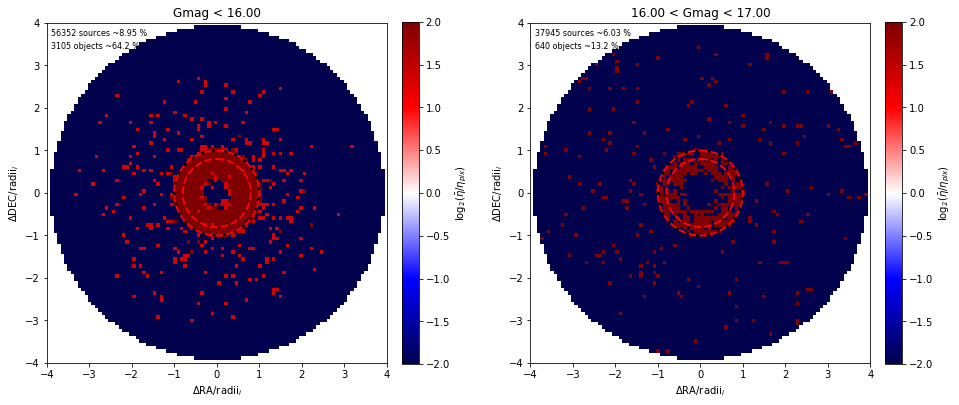

In [80]:
dra, ddec, annM = overdensity(df2[(bgs2) & (MS2)], gaia, Dustin_MS_radii, 'Gmag', 35, density=False, 
                            magbins=(16, 17, 2), radii_2=None, grid=[1,3], SR=[1, 30.], scaling=True, nbins=101, 
                               SR_scaling=4, logDenRat=[-2, 2], radii_bestfit=False, annulus=[0.8, 1])

In [83]:
idx2, idx1, d2d, d_ra, d_dec = search_around(df2[(bgs2) & (MS2)][annM]['RA'], df2[(bgs2) & (MS2)][annM]['DEC'], 
                                             df2['RA'], df2['DEC'], search_radius=0.1)

200 nearby objects ~ 0.0281838 %


Central coords in postage: RA:187.406086789578, DEC:10.883899053307, Cidx:182739, rad:0.75
Central coords in postage: RA:196.157289521023, DEC:7.664370773306, Cidx:467974, rad:0.75
Central coords in postage: RA:197.167991619129, DEC:5.393098486658, Cidx:488895, rad:0.75
Central coords in postage: RA:187.621222939178, DEC:12.624104131420, Cidx:182511, rad:0.75
Central coords in postage: RA:193.005809737265, DEC:11.532299359525, Cidx:690099, rad:0.75
Central coords in postage: RA:183.441122828027, DEC:10.434775109213, Cidx:250114, rad:0.75
Central coords in postage: RA:180.646439967988, DEC:7.033887513466, Cidx:91024, rad:0.75
Central coords in postage: RA:197.574804887404, DEC:10.976622318635, Cidx:672561, rad:0.75
Central coords in postage: RA:196.829267428503, DEC:13.982780926242, Cidx:632962, rad:0.75
Central coords in postage: RA:185.473463698894, DEC:5.610505542698, Cidx:117698, rad:0.75
Central coords in postage: RA:186.491333399589, DEC:11.936647806920, Cidx:340637, rad:0.75
Cent

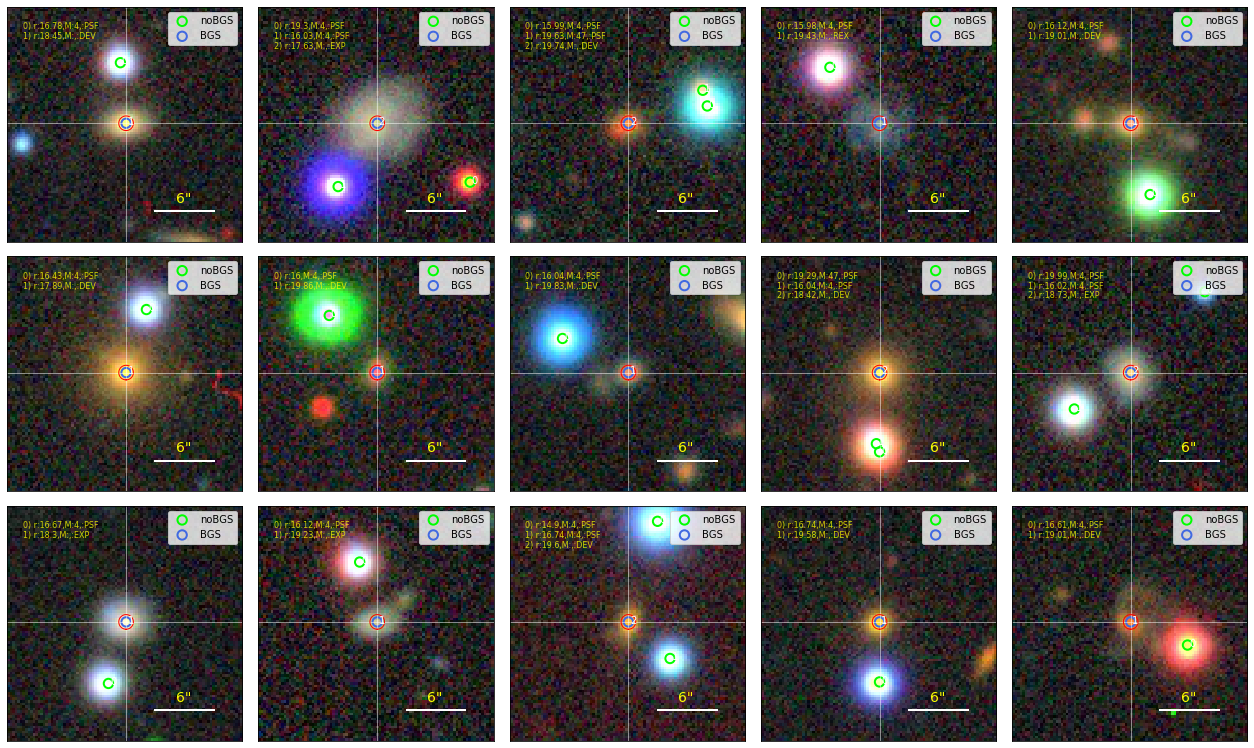

In [89]:
veto = {'noBGS':~bgs2, 'BGS':bgs2}
info = {'r':rmag2,'M':df2['CUTS'], '':df2['TYPE']}
layer_dr7='decals-dr7'

postages_circle(coord=[df2['RA'], df2['DEC']], centeridx=idx1, veto=veto, info=info, scale=0.262, 
                scale_unit='pixscale', layer=layer_dr7, radius=1.5/2./3600, m=16, grid=[3,5], 
                savefile=None, layer2=None, layer2Mode='separate', isLG=False)

In [154]:

eta_primary6, eta_secondary6, etaR_MS6, eta_bgs_MS6 = get_cross_corr(cat1=[df2['RA'], df2['DEC']], cat2=[gaia['RA']*1, gaia['DEC']*1], 
                            randoms=[df2_ran['RA'], df2_ran['DEC']], MASK=((bgs2) & (~MS2)), MASK_ran=((bgs2_ran) & (~MS2_ran)), 
                                            cat2_mag=gaia['Gmag'], limits=limits, mag_list=np.arange(13,22,2))
  

Area of 190 < RA < 200 & 5 < DEC < 15: 98.36 deg^2
D1D1 run time: 65.091850 sec
D1R run time: 459.343973 sec
D1D1 run time: 11.670448 sec
D1R run time: 202.447628 sec
D1D2 run time: 216.614305 sec
D2R run time: 2496.261421 sec
D1D2 run time: 1.838923 sec
D2R run time: 17.992955 sec
D1D2 run time: 3.170259 sec
D2R run time: 49.250642 sec
D1D2 run time: 6.593071 sec
D2R run time: 103.819577 sec
D1D2 run time: 17.642217 sec
D2R run time: 238.725864 sec


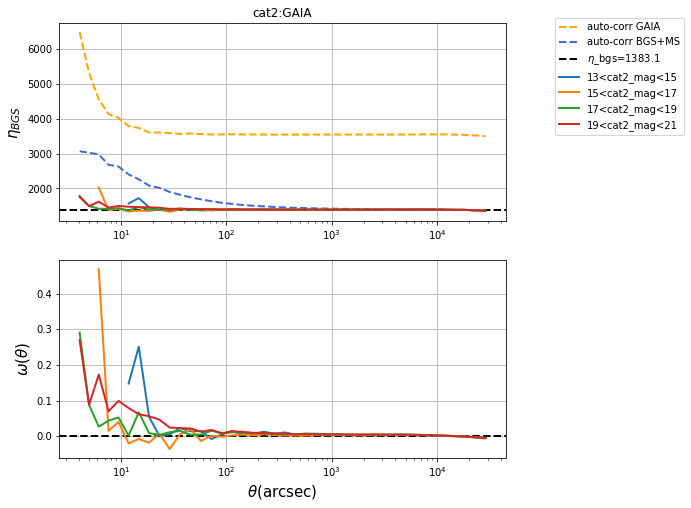

In [158]:
plot_cross_corr(cat1_name='BGS+MS', cat2_name='GAIA', eta_primary=eta_primary6, eta_secondary=eta_secondary6, 
                etaR=etaR_MS6, eta_bgs=eta_bgs_MS6)

## BGS+BS+ALLMASK -- bleed trails

In [28]:
BS1_ALLMASK1_only = np.zeros(len(df1), dtype='?') #Objects rejected by Bright Stars only
for i in ['0', '3', '03']:
    BS1_ALLMASK1_only |= df1['CUTS'] == i

MAG_VT < 10.00
mag_mean 8.828451
15709 nearby objects ~ 5.67965 %
767 sources ~17.4994 % 
15709 15709
154.55913634776923 40.525125801829915
Minimum density ratio = 0, Maximum density ratio = 19.4974
----------------
10.00 < MAG_VT < 12.00
mag_mean 11.178064
52520 nearby objects ~ 18.9888 %
2756 sources ~62.8793 % 
52520 52520
40.46181710503181 20.072348979582006
Minimum density ratio = 0, Maximum density ratio = 6.28036
----------------
12.00 < MAG_VT < 14.00
mag_mean 12.34102
16927 nearby objects ~ 6.12002 %
856 sources ~19.53 % 
16927 16927
20.04896421358714 9.531580261777657
Minimum density ratio = 0, Maximum density ratio = 4.63959
----------------


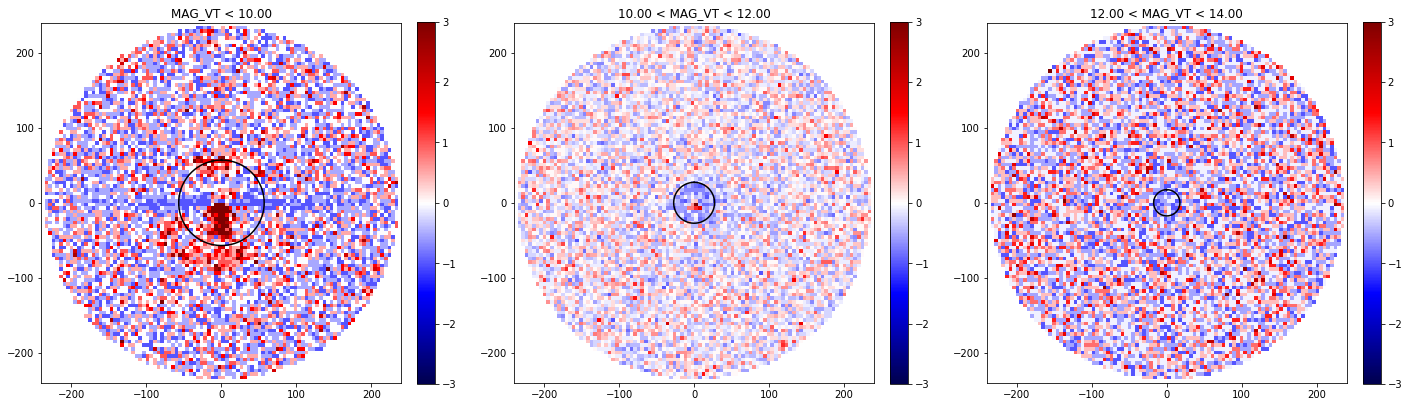

In [38]:
den_tycho_catr_0 = overdensity(df1[(bgs1) | (BS1_ALLMASK1_only)], tycho, kyle_radii, 'MAG_VT', 35, density=False, 
                            magbins=(10,14,3), radii_2=None, grid=[1,3], SR=240., scaling=False)

## BGS+BS+NOBS -- bleed trails

In [52]:
BS1_NOBS1_only = np.zeros(len(df1), dtype='?') #Objects rejected by Bright Stars only
for i in ['0', '2', '02']:
    BS1_NOBS1_only |= df1['CUTS'] == i

In [24]:
den_tycho_catr_0 = overdensity(df1[(bgs1) | (BS1_NOBS1_only)], tycho, kyle_radii, 'MAG_VT', 35, density=False, 
                            magbins=(10,14,3), radii_2=None, grid=[1,3], SR=240.)

NameError: name 'BS1_NOBS1_only' is not defined

MAG_VT < 10.00
mag_mean 8.828451
44369 nearby objects ~ 6.25244 %
767 sources ~17.4994 % 
Minimum density ratio = 0, Maximum density ratio = 22.1734
----------------
10.00 < MAG_VT < 12.00
mag_mean 11.178064
139288 nearby objects ~ 19.6283 %
2756 sources ~62.8793 % 
Minimum density ratio = 0.228837, Maximum density ratio = 12.9293
----------------
12.00 < MAG_VT < 14.00
mag_mean 12.34102
43926 nearby objects ~ 6.19001 %
856 sources ~19.53 % 
Minimum density ratio = 0, Maximum density ratio = 6.90017
----------------


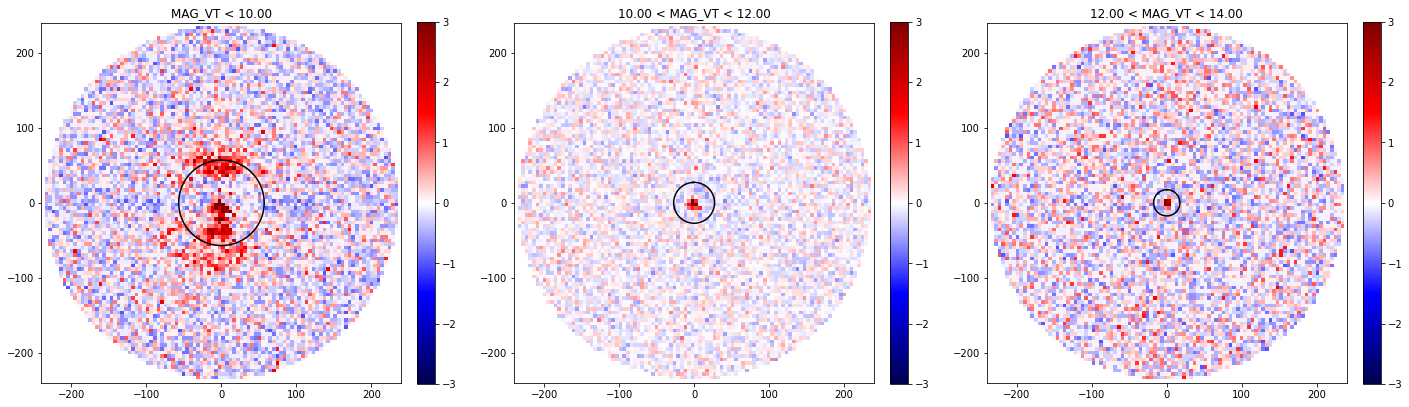

In [54]:
den_tycho_catr_0 = overdensity(df1, tycho, kyle_radii, 'MAG_VT', 35, density=False, 
                            magbins=(10,14,3), radii_2=None, grid=[1,3], SR=240.)

# Postages

## GAIA example...

Gmag < 13.00
808 nearby objects ~ 16.6977 %
mag_radii MAX: 38.6308040610739 mag_radii MIN: 21.35342368068725
mag MAX: 12.9987 mag MIN: 11.0634
d2d min=0.199, d2d max=1.37
4839 4839 4839
7155 of inf in density ratio out of a total of 7556
Minimum density ratio = -2, Maximum density ratio = 6.08835
----------------
13.00 < Gmag < 14.00
774 nearby objects ~ 15.995 %
mag_radii MAX: 21.33190657115481 mag_radii MIN: 15.741827122937277
mag MAX: 13.9999 mag MIN: 13.0018
d2d min=0.235, d2d max=1.77
4839 4839 4839
7159 of inf in density ratio out of a total of 7556
Minimum density ratio = -2, Maximum density ratio = 6.15037
----------------


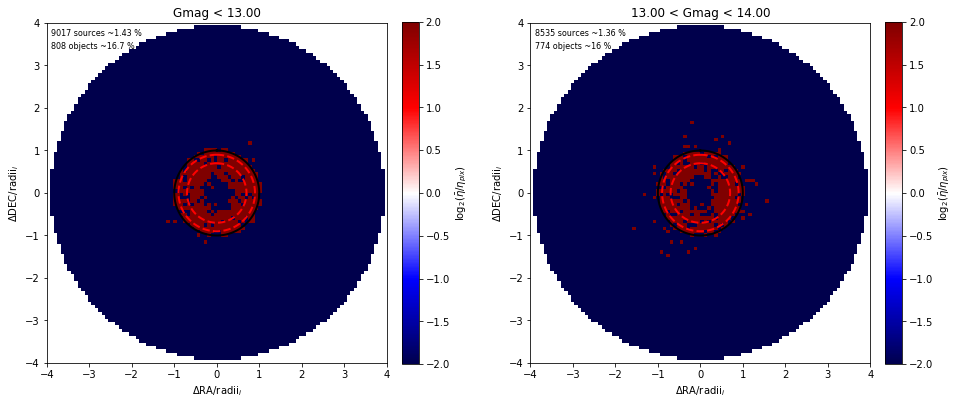

In [136]:
#extract the farthest BGS galaxies within the MS radii (Dustin's radii). 
#Boundaries are selected with annulus param... and selection is a boolean array of cat entry size
#In this case this would be the size of df2[(bgs2) & (MS2)]...
dra, ddec, annM = overdensity(df2[(bgs2) & (MS2)], gaia, Dustin_MS_radii, 'Gmag', 35, density=False, 
                            magbins=(13, 14, 2), radii_2=None, grid=[1,3], SR=[1, 30.], scaling=True, nbins=101, 
                               SR_scaling=4, logDenRat=[-2, 2], radii_bestfit=False, annulus=[0.7, 0.9])

In [137]:
#Once located the objects within annulus, the easiest way to locate those in the full catalogue (i.e., df1 or df2)
#is to match these.
idx2, idx1, d2d, d_ra, d_dec = search_around(df2[(bgs2) & (MS2)][annM]['RA'], df2[(bgs2) & (MS2)][annM]['DEC'], 
                                             df2['RA'], df2['DEC'], search_radius=0.1)

275 nearby objects ~ 0.0387528 %


Central coords in postage: RA:199.259461982571, DEC:6.128173117920, Cidx:374971, rad:1.5
Central coords in postage: RA:195.914198725954, DEC:7.214892096232, Cidx:423896, rad:1.5
Central coords in postage: RA:195.464573559026, DEC:14.828139258343, Cidx:593302, rad:1.5
Central coords in postage: RA:184.102765682739, DEC:13.791499766693, Cidx:244747, rad:1.5
Central coords in postage: RA:181.607789372588, DEC:13.733804625155, Cidx:317018, rad:1.5
Central coords in postage: RA:185.503596684288, DEC:12.293708798254, Cidx:301715, rad:1.5
Central coords in postage: RA:186.269850013905, DEC:7.821210587413, Cidx:156510, rad:1.5
Central coords in postage: RA:186.263475779243, DEC:7.822532411573, Cidx:156509, rad:1.5
Central coords in postage: RA:192.778308422978, DEC:14.956992830563, Cidx:657045, rad:1.5
Central coords in postage: RA:195.086120967333, DEC:13.528424693617, Cidx:598852, rad:1.5


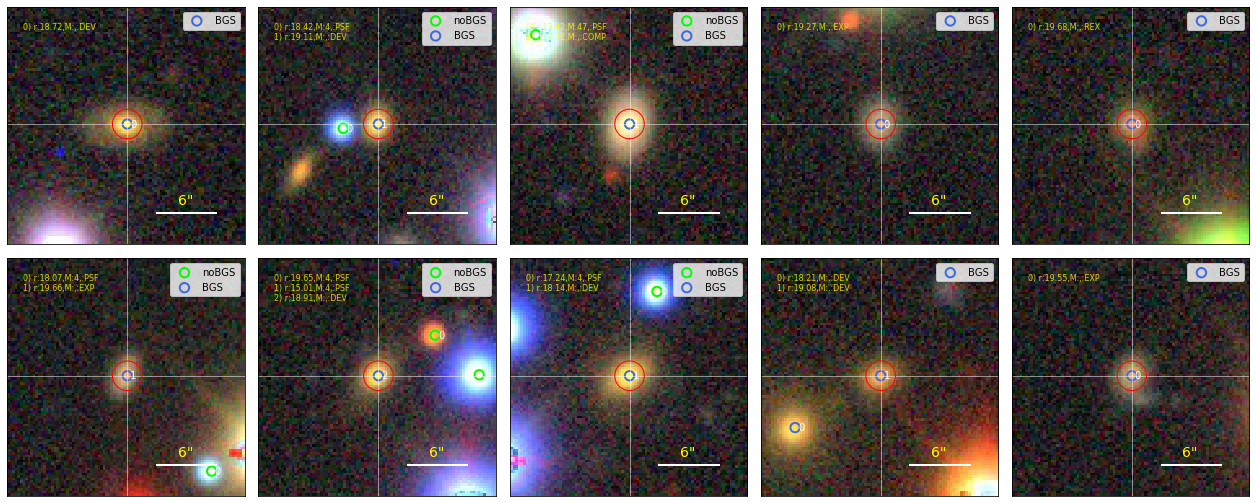

In [138]:
#The previous match will give us the index of this BGS objects, which is the basis to get the postages...
veto = {'noBGS':~bgs2, 'BGS':bgs2}
info = {'r':rmag2,'M':df2['CUTS'], '':df2['TYPE']}
layer_dr7='decals-dr7'

postages_circle(coord=[df2['RA'], df2['DEC']], centeridx=idx1, veto=veto, info=info, scale=0.262, 
                scale_unit='pixscale', layer=layer_dr7, radius=1.5/3600, m=8, grid=[2,5], 
                savefile=None, layer2=None, layer2Mode='separate', isLG=False)

## Tycho2 Example -- with Kyle radii...

MAG_VT < 8.00
1498 nearby objects ~ 53.1771 %
mag_radii MAX: 154.55913634776923 mag_radii MIN: 70.75514200327498
mag MAX: 7.997 mag MIN: 0.0
d2d min=0.0547, d2d max=2.8
2817 2817 2817
7187 of inf in density ratio out of a total of 7556
Minimum density ratio = -3, Maximum density ratio = 8.09083
----------------
8.00 < MAG_VT < 9.00
389 nearby objects ~ 13.809 %
mag_radii MAX: 70.22927879361016 mag_radii MIN: 54.435998237359016
mag MAX: 8.997 mag MIN: 8.027
d2d min=0.0597, d2d max=4.3
2817 2817 2817
7307 of inf in density ratio out of a total of 7556
Minimum density ratio = -3, Maximum density ratio = 8.20353
----------------


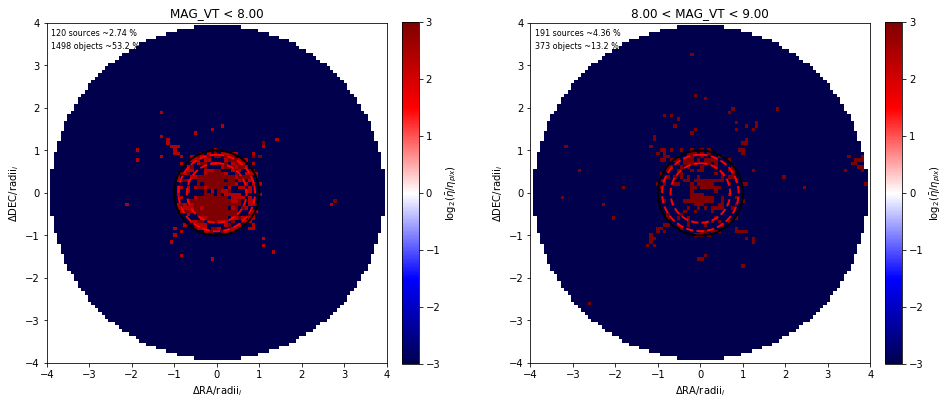

In [125]:
#extract the farthest BGS galaxies within the MS radii (Dustin's radii). 
#Boundaries are selected with annulus param... and selection is a boolean array of cat entry size
#In this case this would be the size of df2[(bgs2) & (MS2)]...
dra, ddec, annM = overdensity(df1[BS1_only], tycho, kyle_radii, 'MAG_VT', 35, density=False, 
                            magbins=(8, 9, 2), radii_2=None, grid=[1,3], SR=[1, 240.], scaling=True, nbins=101, 
                               SR_scaling=4, logDenRat=[-3, 3], radii_bestfit=True, annulus=[0.7, 0.9])

In [126]:
#Once located the objects within annulus, the easiest way to locate those in the full catalogue (i.e., df1 or df2)
#is to match these.
print(np.sum(annM))
idx2, idx1, d2d, d_ra, d_dec = search_around(df1[BS1_only][annM]['RA'], df1[BS1_only][annM]['DEC'], 
                                             df1['RA'], df1['DEC'], search_radius=0.1)

52
52 nearby objects ~ 0.00732779 %


Central coords in postage: RA:197.882718472238, DEC:7.420876473130, Cidx:532894, rad:1.5
Central coords in postage: RA:199.522943235365, DEC:12.993658403281, Cidx:543946, rad:1.5
Central coords in postage: RA:187.069422095379, DEC:11.839860594035, Cidx:190560, rad:1.5
Central coords in postage: RA:195.333384402998, DEC:13.172929700075, Cidx:608634, rad:1.5
Central coords in postage: RA:182.992817758115, DEC:9.294188009094, Cidx:167884, rad:1.5
Central coords in postage: RA:182.769501323916, DEC:12.467617390289, Cidx:342191, rad:1.5
Central coords in postage: RA:184.967596487108, DEC:14.394179011133, Cidx:300665, rad:1.5
Central coords in postage: RA:196.012231652256, DEC:5.197278149133, Cidx:429441, rad:1.5
Central coords in postage: RA:186.879653376337, DEC:8.021777751145, Cidx:146294, rad:1.5
Central coords in postage: RA:183.200920246327, DEC:11.100614305650, Cidx:247747, rad:1.5


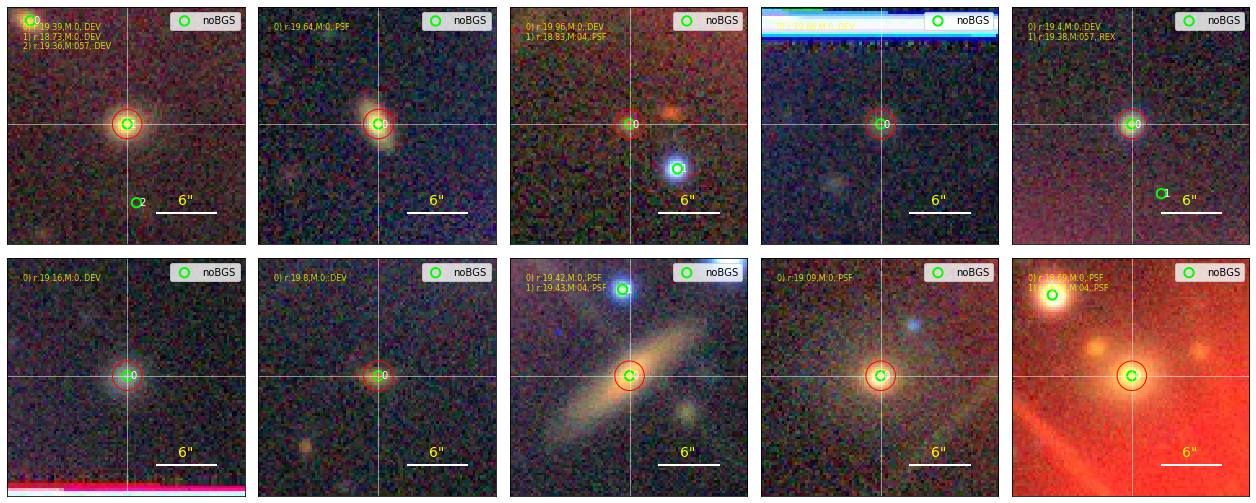

In [127]:
#The previous match will give us the index of this BGS objects, which is the basis to get the postages...
veto = {'noBGS':~bgs1, 'BGS':bgs1}
info = {'r':rmag1,'M':df1['CUTS'], '':df1['TYPE']}
layer_dr7='decals-dr7'

postages_circle(coord=[df1['RA'], df1['DEC']], centeridx=idx1, veto=veto, info=info, scale=0.262, 
                scale_unit='pixscale', layer=layer_dr7, radius=1.5/3600, m=8, grid=[2,5], 
                savefile=None, layer2=None, layer2Mode='separate', isLG=False)

## Tycho2 Example -- with Dustin's radii...

MAG_VT < 8.00
1979 nearby objects ~ 43.1719 %
mag_radii MAX: 545.882475465724 mag_radii MIN: 135.9053413027932
mag MAX: 7.997 mag MIN: 0.0
d2d min=0.0229, d2d max=1.45
4584 4584 4584
7244 of inf in density ratio out of a total of 7556
Minimum density ratio = -3, Maximum density ratio = 9.03305
----------------
8.00 < MAG_VT < 9.00
587 nearby objects ~ 12.8054 %
mag_radii MAX: 134.83491797679756 mag_radii MIN: 102.7635068398372
mag MAX: 8.997 mag MIN: 8.027
d2d min=0.0312, d2d max=2.29
4584 4584 4584
7268 of inf in density ratio out of a total of 7556
Minimum density ratio = -3, Maximum density ratio = 8.20142
----------------


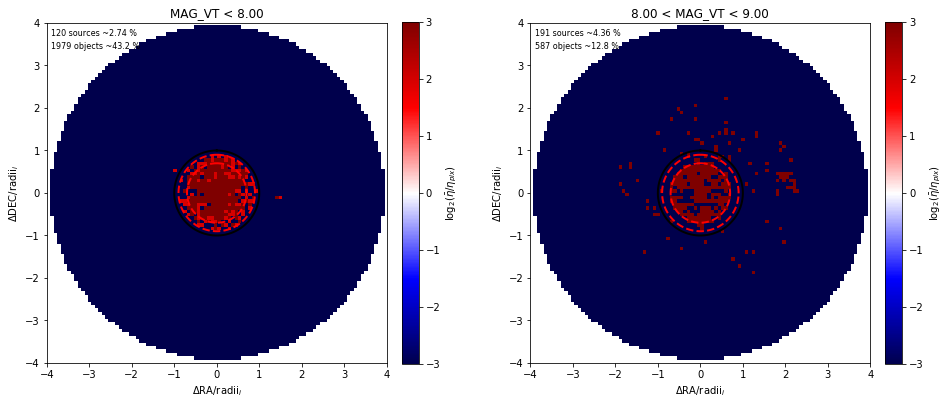

In [129]:
#extract the farthest BGS galaxies within the MS radii (Dustin's radii). 
#Boundaries are selected with annulus param... and selection is a boolean array of cat entry size
#In this case this would be the size of df2[(bgs2) & (MS2)]...
dra, ddec, annM = overdensity(df2[BS2_only], tycho, Dustin_MS_radii, 'MAG_VT', 35, density=False, 
                            magbins=(8, 9, 2), radii_2=None, grid=[1,3], SR=[1, 240.], scaling=True, nbins=101, 
                               SR_scaling=4, logDenRat=[-3, 3], radii_bestfit=True, annulus=[0.7, 0.9])

In [130]:
#Once located the objects within annulus, the easiest way to locate those in the full catalogue (i.e., df1 or df2)
#is to match these.
print(np.sum(annM))
idx2, idx1, d2d, d_ra, d_dec = search_around(df2[BS2_only][annM]['RA'], df2[BS2_only][annM]['DEC'], 
                                             df2['RA'], df2['DEC'], search_radius=0.1)

21
21 nearby objects ~ 0.0029593 %


Central coords in postage: RA:192.204212815329, DEC:14.056650465410, Cidx:655990, rad:1.5
Central coords in postage: RA:181.233183227563, DEC:8.739288575078, Cidx:133649, rad:1.5
Central coords in postage: RA:184.757426351927, DEC:10.587518640074, Cidx:265246, rad:1.5
Central coords in postage: RA:186.627804747083, DEC:5.307553106293, Cidx:141730, rad:1.5
Central coords in postage: RA:194.788311073009, DEC:7.871130207023, Cidx:382514, rad:1.5
Central coords in postage: RA:197.483768938564, DEC:7.413781182584, Cidx:491844, rad:1.5
Central coords in postage: RA:199.920890197106, DEC:5.449490318180, Cidx:375921, rad:1.5
Central coords in postage: RA:196.020749483975, DEC:5.165690917777, Cidx:429428, rad:1.5
Central coords in postage: RA:186.863534078792, DEC:7.987365805505, Cidx:146283, rad:1.5
Central coords in postage: RA:194.791445262543, DEC:7.871873878908, Cidx:382513, rad:1.5


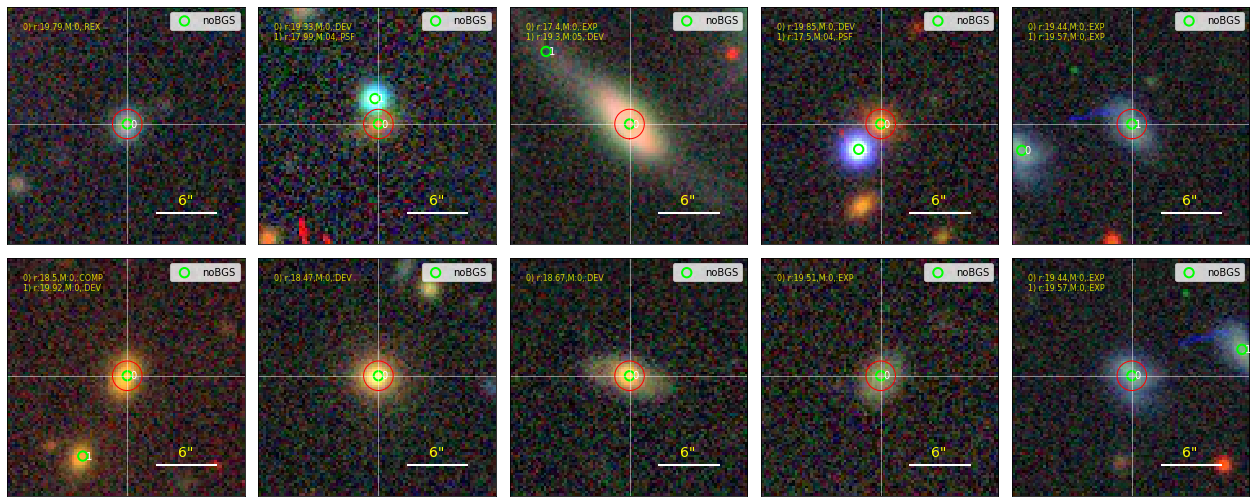

In [132]:
#The previous match will give us the index of this BGS objects, which is the basis to get the postages...
veto = {'noBGS':~bgs2, 'BGS':bgs2}
info = {'r':rmag2,'M':df2['CUTS'], '':df2['TYPE']}
layer_dr7='decals-dr7'

postages_circle(coord=[df2['RA'], df2['DEC']], centeridx=idx1, veto=veto, info=info, scale=0.262, 
                scale_unit='pixscale', layer=layer_dr7, radius=1.5/3600, m=8, grid=[2,5], 
                savefile=None, layer2=None, layer2Mode='separate', isLG=False)

In [38]:
df2[(bgs2) & (MS2)]

array([(187.82006592,  8.31720368, 'EXP ',  14.358725,  11.272756 ,  18.949903, 0.9615736 , 0.9434896 , 0.97832066, 0., False,  2.6652763, False, ''),
       (187.66285763,  8.40642891, 'EXP ',  28.042572,  14.276004 ,  42.646446, 0.9586674 , 0.9392595 , 0.9766657 , 0., False,  4.393253 , False, ''),
       (187.4029397 ,  9.41827872, 'EXP ',  12.833832,   4.920349 ,  25.848719, 0.96321476, 0.9458811 , 0.9792543 , 0., False,  6.144925 , False, ''),
       ...,
       (199.00362615, 10.43063637, 'DEV ',  12.882929,   3.7650301,  24.858072, 0.96366566, 0.94653857, 0.97951066, 0., False,  6.629209 , False, ''),
       (199.01996743, 10.57548795, 'DEV ',  12.727918,   2.3039815,  28.976347, 0.95870537, 0.9393147 , 0.97668725, 0., False,  4.4399133, False, ''),
       (198.93411484, 10.62447203, 'EXP ', 141.68036 , 109.62595  , 168.99886 , 0.95961577, 0.9406392 , 0.977206  , 0., False, 10.236033 , False, '')],
      dtype=[('RA', '<f8'), ('DEC', '<f8'), ('TYPE', '<U4'), ('FLUX_R', '<f4'), (

In [ ]:
def inStar(StarCat, cat, StarMask, catMask):
    '''
    Match BGS cat with Tycho2
    
    Inputs:
    -------
    MASK: array:boolean:: Boolen array with Tycho2 size
    
    Returns:
    -------
    idx1: array: int:: BGS Index array of matched objects
    kyle_rad: array: float:: BGS array-like (same lenght as BGS) of Kyle's radius for Tycho2 Stars (if any) in arcsec
    Dustin_rad: array: float:: BGS array-like (same lenght as BGS) of Dustin's radius for Tycho2 Stars (if any) in arcsec
    '''
    
    if MASK is None:
        MASK = np.ones(len(tycho), bool)
        
    idx2, idx1, d2d, d_ra, d_dec = search_around(tycho['RA'][MASK], tycho['DEC'][MASK], BGS['RA'], 
                                             BGS['DEC'], search_radius=0.5)
    
    kyle_rad = np.zeros(len(BGS), float)
    dustin_rad = np.zeros(len(BGS), float)
    ty_mag = np.zeros(len(BGS), float)

    #dustin_rad2[idx1] = np.minimum(1800., 150. * 2.5**((11. - tycho['MAG_VT'][MASK][idx2])/3.)) * 0.262/1
    dustin_rad[idx1] = circular_mask_radii_func(tycho['MAG_VT'][MASK][idx2], Dustin_MS_radii, bestfit=False)
    kyle_rad[idx1] = circular_mask_radii_func(tycho['MAG_VT'][MASK][idx2], kyle_radii, bestfit=True)
    ty_mag[idx1] = tycho['MAG_VT'][MASK][idx2]
    
    return idx1, kyle_rad, dustin_rad

# DEF...

### Rongpu's 2D-stacks:BGS & Tycho2

In [10]:
import Corrfunc
from Corrfunc.mocks.DDtheta_mocks import DDtheta_mocks
import time
from Corrfunc.utils import convert_3d_counts_to_cf

def select_patch(cat, limits):
    
    patch = np.ones(len(cat[0]), bool)
    patch &= np.logical_and(cat[0] > limits[0], cat[0] < limits[1])
    patch &= np.logical_and(cat[1] > limits[2], cat[1] < limits[3])
    
    return patch


def density_in_CC(cat1, cat2, RAND, nbins=40, nthreads=8):
    
    #if limits is None:
    #    raise ValueError('limits can not be None-type...')
        
    #bins = np.linspace(0.1, 10.0, nbins + 1) # note the +1 to nbins
    bins = np.logspace(np.log10(0.001), np.log10(10.0), nbins + 1) #log bins
    #rand_N = len(RAND[0])
    #print('etaR:', etaR)
    
    if cat2 is not None:
        start = time.time()
        D1D2_ = DDtheta_mocks(0, nthreads, bins, cat1[0], cat1[1], RA2=cat2[0], DEC2=cat2[1])
        end = time.time()
        print('D1D2 run time: %f sec' %(end - start))
    
        start = time.time()
        D2R_ = DDtheta_mocks(0, nthreads, bins, RAND[0], RAND[1], RA2=cat2[0], DEC2=cat2[1])
        end = time.time()
        print('D2R run time: %f sec' %(end - start))
    
    else:
        start = time.time()
        D1D2_ = DDtheta_mocks(1, nthreads, bins, cat1[0], cat1[1])
        end = time.time()
        print('D1D1 run time: %f sec' %(end - start))
    
        start = time.time()
        D2R_ = DDtheta_mocks(0, nthreads, bins, RAND[0], RAND[1], RA2=cat1[0], DEC2=cat1[1])
        end = time.time()
        print('D1R run time: %f sec' %(end - start))
    
    eta = []
    binsCentre = []
    halfbin = (D1D2_[0][1] - D1D2_[0][0])/2.
    for i in range(len(D1D2_)):
        binsCentre.append(D1D2_[i][0]+halfbin)
        #if D2R_[i][3] == 0:
        #    eta.append(0)
        #else:
        eta.append(D1D2_[i][3]/D2R_[i][3])
    
    return np.array(binsCentre), np.array(eta)


def get_cross_corr(cat1, cat2, randoms, MASK=None, MASK_ran=None, cat2_mag=None, limits=None, mag_list=None):
    '''
    cat1 and Randoms does not have to include any mask as this are used to get the reduced area for the densities.
    '''
    
    if (cat2_mag is None) or (limits is None) or (mag_list is None):
        raise ValueError('cat2_mag, limits and mag_list can not be None-type...')
        
    patch = select_patch(cat1, limits=limits)
    patch2 = select_patch(cat2, limits=limits)
    patch_ran = select_patch(randoms, limits=limits)
    
    if MASK is None:
        MASK = np.ones(len(cat1[0]))
    if MASK_ran is None:
        MASK_ran = np.ones(len(randoms[0]))

    RA, DEC = cat1[0][(MASK) & (patch)], cat1[1][(MASK) & (patch)]
    RA2, DEC2 = cat2[0][(patch2)]*1, cat2[1][(patch2)]*1 #We've to multiply tycho2 positios by 1 otherwise we have a weir issue
    RA_ran, DEC_ran = randoms[0][(MASK_ran) & (patch_ran)], randoms[1][(MASK_ran) & (patch_ran)]
    
    A = get_area(patch=limits, get_val=True)
    etaR = np.sum(patch_ran)/A #NR/A Total number of Randoms (NR) over total area within patch (A)
    eta_bgs = len(RA)*etaR/len(RA_ran) #Nbgs/Ar Total number of bgs (Nbgs) over reduced area (Ar)
    
    ###---------- Computing the primary (expensier) paircounts ----------
    
    eta_primary = Table()
    eta_secondary = Table()
    #Auto-corr cat2
    bins, eta_cat2 = density_in_CC(cat1=[RA2, DEC2], cat2=None, RAND=[RA_ran, DEC_ran], nbins=40, nthreads=16)
    #Auto-corr BGS
    _, eta_cat1 = density_in_CC(cat1=[RA, DEC], cat2=None, RAND=[RA_ran, DEC_ran], nbins=40, nthreads=16)
    #D1R/RR -- expensier computation used to get the angular clustering of the cross-corr with Hamilton estimator
    _, eta_CC = density_in_CC(cat1=[RA, DEC], cat2=[RA_ran, DEC_ran], RAND=[RA_ran, DEC_ran], nbins=40, nthreads=16)
    
    eta_primary['bins'] = bins
    eta_primary['auto_cat2'] = eta_cat2
    eta_primary['auto_cat1'] = eta_cat1
    eta_primary['D1R/RR'] = eta_CC
    
    ###---------- Computing the secondary (fatest) paircounts ----------
    
    for i in range(len(mag_list)-1):

        mag = np.logical_and(cat2_mag > mag_list[i], cat2_mag < mag_list[i+1])
        RA2, DEC2 = cat2[0][(patch2) & (mag)], cat2[1][(patch2) & (mag)]
        bins, eta_mag = density_in_CC(cat1=[RA, DEC], cat2=[RA2, DEC2], RAND=[RA_ran, DEC_ran], nbins=40, nthreads=16)
        
        col_label = '%i<cat2_mag<%i' %(mag_list[i], mag_list[i+1])
        
        if i == 0:
            eta_secondary['bins'] = bins
        eta_secondary[col_label] = eta_mag
    
    return eta_primary, eta_secondary, etaR, eta_bgs

def plot_cross_corr(cat1_name, cat2_name, eta_primary, eta_secondary, etaR, eta_bgs, ylimU=None, xlimU=None, ylimD=None, xlimD=None):
    #Figure
    fig = plt.figure(figsize=(8,8))
    ax1 = fig.add_subplot(2, 1, 1)
    ax2 = fig.add_subplot(2, 1, 2)

    ax1.semilogx(eta_primary['bins']*3600, eta_primary['auto_cat2']*etaR, lw=2, ls='--', color='orange', label='auto-corr %s' %(cat2_name))
    ax1.semilogx(eta_primary['bins']*3600, eta_primary['auto_cat1']*etaR, lw=2, ls='--', color='royalblue', label='auto-corr %s' %(cat1_name))
    
    ax1.axhline(eta_bgs, ls='--', lw=2, color='k', label='$\eta$_bgs=%2.5g' %(eta_bgs))
    ax2.axhline(0, ls='--', lw=2, color='k')

    for i,j in enumerate(eta_secondary.colnames[1:]):

        #Plotting the density cross-corr
        ax1.set_title(r'cat2:%s' %(cat2_name))
        ax1.semilogx(eta_secondary['bins']*3600, eta_secondary[j]*etaR, lw=2, label='%s' %(j))
        #Plotting the angular cross-corr w(theta)
        ax2.semilogx(eta_secondary['bins']*3600, (eta_secondary[j]/eta_primary['D1R/RR'])-1., lw=2, label='%s' %(j))

    #ax1.set_xlabel(r'$\theta$(arcsec)', fontsize=15)
    ax1.set_ylabel(r'$\eta_{BGS}$', fontsize=15)
    ax1.legend(bbox_to_anchor=(1.1, 1.05))
    ax1.grid()

    ax2.set_xlabel(r'$\theta$(arcsec)', fontsize=15)
    ax2.set_ylabel(r'$\omega(\theta)$', fontsize=15)
    #ax2.legend(bbox_to_anchor=(1.1, 1.05))
    ax2.grid()
    
    if ylimU is not None:
        ax1.set_ylim(ylimU)
    if ylimD is not None:
        ax2.set_ylim(ylimD)


# DEV ZONE...

## Pair count with Kdcount example

### define 2D stacks images function...

In [75]:
from astropy.coordinates import SkyCoord
from astropy import units as u
import matplotlib.gridspec as gridspec

def overdensity(cat, star, radii_1, nameMag, slitw, density=False, magbins=(8,14,4), radii_2=None, 
                grid=None, SR=[2, 240.], scaling=False, nbins=101, SR_scaling=4, logDenRat=[-3, 3], 
                    radii_bestfit=True, annulus=None):
    '''
    Get scatter and density plots of objects of cat1 around objects of cat2 within a search radius in arcsec.

    Inputs
    ------
    cat: (array) catalogue 1;
    star: (array) catalogue 2;
    nameMag: (string) label of magnitude in catalogue 2;
    slitw: (float, integer) slit widht;
    density: (boolean) True to get the density as function of distance (arcsec) within shells;
    magbins: (integers) format to separate the magnitude bins in cat2 (min, max, number bins);

    Output
    ------
    (distance (arcsec), density) if density=True
    '''
    # define the slit width for estimating the overdensity off diffraction spikes
    slit_width = slitw
    search_radius = SR[1]

    # Paramater for estimating the overdensities
    annulus_min = SR[0]
    annulus_max = SR[1]

    ra2 = star['RA']
    dec2 = star['DEC']
    
    ra1 = cat['RA']
    dec1 = cat['DEC']

    if density:

        idx2, idx1, d2d, d_ra, d_dec = search_around(ra2, dec2, ra1, dec1,
                                                 search_radius=search_radius)
        density = []
        shells = np.linspace(1, search_radius, search_radius)
        for i in range(len(shells)-1):

            ntot_annulus = np.sum((d2d>shells[i]) & (d2d<shells[i+1]))
            density_annulus = ntot_annulus/(np.pi*(shells[i+1]**2 - shells[i]**2))
            bincenter = (shells[i]+shells[i+1])/2

            density.append([bincenter, density_annulus])

        density = np.array(density).transpose()
        plt.figure(figsize=(12, 8))
        plt.semilogy(density[0], density[1])
        plt.xlabel(r'r(arcsec)')
        plt.ylabel(r'N/($\pi r^2$)')
        plt.grid()
        plt.show()

        return density


    mag_bins = np.linspace(magbins[0], magbins[1], magbins[2])
    
    if grid is not None:
        rows, cols = grid[0], grid[1]
    else:
        rows, cols = len(mag_bins), 1
    figsize = (8*cols, 8*rows)
    gs = gridspec.GridSpec(rows, cols)
    gs.update(wspace=0.3, hspace=0.2)
    fig = plt.figure(num=1, figsize=figsize)
    ax = []

    for index in range(len(mag_bins)):

        if index==0:
            mask_star = (star[nameMag]<mag_bins[index])
            title = '{} < {:.2f}'.format(nameMag,mag_bins[0], np.sum(mask_star))
        else:
            mask_star = (star[nameMag]>mag_bins[index-1]) & (star[nameMag]<mag_bins[index])
            title = '{:.2f} < {} < {:.2f}'.format(mag_bins[index-1], nameMag, mag_bins[index], np.sum(mask_star))

        print(title)

        if not scaling:
            #get the mask radii from the mean magnitude
            mag_mean = np.mean(star[nameMag][mask_star])
            print('mag_mean', mag_mean)
            mask_radius = circular_mask_radii_func([mag_mean], radii_1, bestfit=radii_bestfit)[0]
            if radii_2:
                mask_radius2 = circular_mask_radii_func([mag_mean], radii_2)[0]

        idx2, idx1, d2d, d_ra, d_dec = search_around(ra2[mask_star], dec2[mask_star], ra1, dec1,
                                                 search_radius=annulus_max)

        Nsources = len(ra2[mask_star])
        perc_sources = 100*len(ra2[mask_star])/len(ra2)
        
        #print('%d sources ~%g %% ' %(Nsources, perc_sources))
        
        mag_radii = circular_mask_radii_func(star[nameMag][mask_star][idx2], radii_1, bestfit=radii_bestfit)
        #print(len(d_ra), len(mag_radii))
        print('mag_radii MAX:',mag_radii.max(), 'mag_radii MIN:',mag_radii.min())
        print('mag MAX:',star[nameMag][mask_star][idx2].max(), 'mag MIN:',star[nameMag][mask_star][idx2].min())

        #markersize = np.max([0.01, np.min([10, 0.3*100000/len(idx2)])])
        #axis = [-search_radius*1.05, search_radius*1.05, -search_radius*1.05, search_radius*1.05]
        #axScatter = scatter_plot(d_ra, d_dec, markersize=markersize, alpha=0.4, figsize=6.5, axis=axis, title=title)
        
        row = (index // cols)
        col = index % cols
        ax.append(fig.add_subplot(gs[row, col]))
        
        if scaling:
            d2d_arcsec = d2d
            d_ra, d_dec, d2d = d_ra/mag_radii, d_dec/mag_radii, d2d_arcsec/mag_radii
            search_radius = SR_scaling #d2d.max() - d2d.max()*0.3
            #ntot_annulus = np.sum((d2d_arcsec>annulus_min) & (d2d<search_radius))
            ntot_annulus = np.sum(d2d<search_radius)
            #density_annulus = ntot_annulus/(np.pi*(search_radius**2 - d2d[d2d_arcsec > 2].min()**2))
            density_annulus = ntot_annulus/(np.pi*(search_radius**2))
            #print('ntot_annulus:', ntot_annulus, 'density_annulus:', density_annulus)
            print('d2d min=%2.3g, d2d max=%2.3g' %(d2d.min(), d2d.max()))
        else:
            d2d_arcsec = None
            ntot_annulus = np.sum((d2d>annulus_min) & (d2d<annulus_max))
            density_annulus = ntot_annulus/(np.pi*(annulus_max**2 - annulus_min**2))
        
        if annulus is not None:
            annMask = np.ones(len(cat), dtype='?')
            d_ra2 = np.zeros(len(cat))
            d_dec2 = np.zeros(len(cat))
            d_ra2[idx1] = d_ra
            d_dec2[idx1] = d_dec
            print(len(cat), len(d_ra2), len(d_dec2))
            #print(len(set(idx1)), len(set(idx2)))
            #print(idx1.max(), idx2.max())
            #angle_array = np.linspace(0, 2*np.pi, 240)
            annMask &= np.logical_and((d_ra2**2 + d_dec2**2) < annulus[1]**2, (d_ra2**2 + d_dec2**2) > annulus[0]**2)
            
            #annMask &= np.logical_and(d_dec < annulus[1] * np.cos(angle_array), d_dec > annulus[0] * np.cos(angle_array))
        
        bins, mesh_d2d, density_ratio = relative_density_plot(d_ra, d_dec, d2d, search_radius,
                        ref_density=density_annulus, return_res=True,
                            show=False, nbins=nbins, ax=ax[-1], d2d_arcsec=d2d_arcsec, annulus_min=annulus_min, logDenRat=logDenRat)
   
        if not scaling:
            angle_array = np.linspace(0, 2*np.pi, 240)
            x = mask_radius * np.sin(angle_array)
            y = mask_radius* np.cos(angle_array)
            ax[-1].plot(x, y, 'k', lw=2)
            
            ax[-1].text(-annulus_max+annulus_max*0.02, annulus_max-annulus_max*0.05, '%d sources ~%2.3g %% ' %(Nsources, perc_sources), fontsize=8,color='k')
            ax[-1].text(-annulus_max+annulus_max*0.02, annulus_max-annulus_max*0.11, '%d objects ~%2.3g %% ' %(ntot_annulus, 100*ntot_annulus/len(ra1)), fontsize=8,color='k')
            #ax[-1].text(-annulus_max+annulus_max*0.02, annulus_max-annulus_max*0.17, '$\eta$=%2.3g arcsec$^{-2}$' %(density_annulus), fontsize=8,color='k')

            ax[-1].set_xlabel(r'$\Delta$RA (arcsec)')
            ax[-1].set_ylabel(r'$\Delta$DEC (arcsec)')
        
            if radii_2:
                x2 = mask_radius2 * np.sin(angle_array)
                y2 = mask_radius2 * np.cos(angle_array)
                ax[-1].plot(x2, y2, 'k', lw=1.5, linestyle='--')
        else:
            angle_array = np.linspace(0, 2*np.pi, 100)
            x = 1 * np.sin(angle_array)
            y = 1 * np.cos(angle_array)
            ax[-1].plot(x, y, 'k', lw=2)
            
            ax[-1].text(-SR_scaling+0.1, SR_scaling-0.3, '%d sources ~%2.3g %% ' %(Nsources, perc_sources), fontsize=8,color='k')
            ax[-1].text(-SR_scaling+0.1, SR_scaling-0.6, '%d objects ~%2.3g %% ' %(ntot_annulus, 100*ntot_annulus/len(ra1)), fontsize=8,color='k')
            #ax[-1].text(-SR_scaling+0.1, SR_scaling-0.9, '$\eta$=%2.3g deg$^{-2}$' %(density_annulus), fontsize=8,color='k')

            ax[-1].set_xlabel(r'$\Delta$RA/radii$_{i}$')
            ax[-1].set_ylabel(r'$\Delta$DEC/radii$_{i}$')
            
        ax[-1].set_title(title)
        for i in annulus:
            x = i * np.sin(angle_array)
            y = i * np.cos(angle_array)
            ax[-1].plot(x, y, 'red', lw=2, ls='--')
            
    return d_ra2, d_dec2, annMask
        
        #plt.show()
        
def search_around(ra1, dec1, ra2, dec2, search_radius=1., verbose=True):
    '''
    Using the astropy.coordinates.search_around_sky module to find all pairs within
    some search radius.
    Inputs:
    RA and Dec of two catalogs;
    search_radius (arcsec);
    Outputs:
        idx1, idx2: indices of matched objects in the two catalogs;
        d2d: angular distances (arcsec);
        d_ra, d_dec: the differences in RA and Dec (arcsec);
    '''

    # protect the global variables from being changed by np.sort
    ra1, dec1, ra2, dec2 = map(np.copy, [ra1, dec1, ra2, dec2])

    # Matching catalogs
    sky1 = SkyCoord(ra1*u.degree,dec1*u.degree, frame='icrs')
    sky2 = SkyCoord(ra2*u.degree,dec2*u.degree, frame='icrs')
    idx1, idx2, d2d, d3d = sky2.search_around_sky(sky1, seplimit=search_radius*u.arcsec)
    if verbose:
        print('%d nearby objects ~ %g %%'%(len(idx1), 100*len(idx1)/len(ra2)))

    # convert distances to numpy array in arcsec
    d2d = np.array(d2d.to(u.arcsec))


    d_ra = (ra2[idx2]-ra1[idx1])*3600.    # in arcsec
    d_dec = (dec2[idx2]-dec1[idx1])*3600. # in arcsec
    ##### Convert d_ra to actual arcsecs #####
    mask = d_ra > 180*3600
    d_ra[mask] = d_ra[mask] - 360.*3600
    mask = d_ra < -180*3600
    d_ra[mask] = d_ra[mask] + 360.*3600
    d_ra = d_ra * np.cos(dec1[idx1]/180*np.pi)
    ##########################################

    return idx1, idx2, d2d, d_ra, d_dec

def relative_density_plot(d_ra, d_dec, d2d, search_radius, ref_density, nbins=101, return_res=False, 
                          show=True, ax=plt, d2d_arcsec=None, annulus_min=2, logDenRat=[-3,3]):

    bins = np.linspace(-search_radius, search_radius, nbins)
    bin_spacing = bins[1] - bins[0]
    bincenter = (bins[1:]+bins[:-1])/2
    mesh_ra, mesh_dec = np.meshgrid(bincenter, bincenter)
    mesh_d2d = np.sqrt(mesh_ra**2 + mesh_dec**2)
    if d2d_arcsec is not None:
        mask = (d2d_arcsec>annulus_min) #to avoid self match with stars
    else:
        mask = (d2d>annulus_min) #to avoid self match with stars
    #taking the 2d histogram and divide by the area of each bin to get the density
    density, _, _ = np.histogram2d(d_ra[mask], d_dec[mask], bins=bins)/(bin_spacing**2)
    #ignoring data outside the circle with radius='search radius'
    #print('Nbins:',len(bins), 'binArea:', bin_spacing**2, 'Nobjects:', len(d_ra[mask]))
    #pix_density = len(d_ra[mask])/((len(bins)**2)*(bin_spacing**2))
    #print('tot_density_pix:', pix_density)
    
    mask = mesh_d2d >= bins.max()-bin_spacing
    density[mask] = np.nan
    #density_ratio = density/ref_density
    density_ratio = np.log2(density/ref_density)
    
    idxinf = np.where(np.isinf(density_ratio))
    #print('inf values:',density_ratio[idxinf])
    print('%d of inf in density ratio out of a total of %d' %(len(density_ratio[idxinf]), len(density_ratio[~np.isnan(density_ratio)])))
    density_ratio[idxinf] = logDenRat[0]
    #print('inf values AFTER:',density_ratio[idxinf])
    
    den_rat = density_ratio[~np.isnan(density_ratio)]
    denmin = den_rat.min()
    denmax = den_rat.max()
    print('Minimum density ratio = %g, Maximum density ratio = %g' %(denmin, denmax))
    print('----------------')
    fig = plt.figure(1)
    #img = ax.imshow(density_ratio.transpose()-1, origin='lower', aspect='equal',
    img = ax.imshow(density_ratio.transpose(), origin='lower', aspect='equal',
               cmap='seismic', extent=bins.max()*np.array([-1, 1, -1, 1]), vmin=logDenRat[0], vmax=logDenRat[1])
    #ax.colorbar(fraction=0.046, pad=0.04)
    fig.colorbar(img, fraction=0.046, pad=0.04, label=r'$\log_{2}(\bar\eta/\eta_{pix})$')
    if show:
        ax.show()

    if return_res:
        return bins, mesh_d2d, density_ratio

In [79]:
def coordtopix2(center, coord, size, scale):
    
    RA_pix = []
    DEC_pix = []
    #print('Center coords entering coordtopix: RA:%.12f, DEC:%.12f' %(center[0], center[1]))
    for i in range(len(coord[0])):
        #print('non-center coords entering coordtopix: RA:%.12f, DEC:%.12f' %(coord[0][i], coord[1][i]))
        #print('NORMAL:non-center coords entering coordtopix: RA:%f, DEC:%f' %(coord[0][i], coord[1][i]))
        #print('output diff center-coords in coordtopix: DRA:%.12f, DDEC:%.12f' %(center[0]-coord[0][i], center[1]-coord[1][i]))
        #print('NORMAL:output diff center-coords in coordtopix: DRA:%f, DDEC:%f' %(center[0]-coord[0][i], center[1]-coord[1][i]))
        print('RA_pix: %f, DEC_pix: %f' %(size/2. + (round(center[0], 12)-round(coord[0][i], 12))*3600./scale,
                                         size/2. + (round(center[1], 12)-round(coord[1][i], 12))*3600./scale))
        print('NORMAL:RA_pix: %f, DEC_pix: %f' %(float(size/2) + (center[0]-coord[0][i])*float(3600/scale),
                                         float(size/2) + (center[1]-coord[1][i])*float(3600/scale)))
        ra_pix = size/2. + (round(center[0], 12)-round(coord[0][i], 12))*3600./scale
        dec_pix = size/2. + (round(center[1], 12)-round(coord[1][i], 12))*3600./scale
        RA_pix.append(ra_pix)
        DEC_pix.append(dec_pix)
    
    return RA_pix, DEC_pix

def coordtopix(center, coord, size, scale):
    
    RA_pix = []
    DEC_pix = []
    for i in range(len(coord[0])):
        d_ra = (center[0]-coord[0][i])*3600
        d_dec = (center[1]-coord[1][i])*3600
        if d_ra > 180*3600:
            d_ra = d_ra - 360.*3600
        elif d_ra < -180*3600:
            d_ra = d_ra + 360.*3600
        else:
            d_ra = d_ra
        d_ra = d_ra * np.cos(coord[1][i]/180*np.pi)
        
        ra_pix = size/2. + d_ra/scale
        dec_pix = size/2. + d_dec/scale
        RA_pix.append(ra_pix)
        DEC_pix.append(dec_pix)
    
    return RA_pix, DEC_pix

def disttopix(D, scale):
    '''
    D must be in arcsec...
    '''
    
    dpix = D/scale
    
    return dpix


def plot_circle_img(coord, centeridx, veto=None, info=None, scale=0.262, scale_unit='pixscale', layer='decals-dr7', 
                    radius=None, m=4, ax=plt, isLG=None):
    
    from astropy.utils.data import download_file  #import file from URL
    from matplotlib.ticker import NullFormatter
    from matplotlib.patches import Ellipse
        
    RAidx = coord[0][centeridx] #centre
    DECidx = coord[1][centeridx] #centre
        
    if isLG:
        print('Central coords in postage: RA:%.12f, DEC:%.12f, Cidx:%d, rad:%2.2g' %(RAidx, DECidx, centeridx, radius[0]*3600))
        ramin, ramax = RAidx-m*radius[0], RAidx+m*radius[0]
        decmin, decmax = DECidx-m*radius[0], DECidx+m*radius[0]
        #postage image sizes
        boxsize = 2*m*radius[0]*3600
        size = int(round(boxsize/scale))
        rad_pix = disttopix(radius[0]*3600., scale=scale)
        major_pix = disttopix(D=radius[0]*3600, scale=scale)
        minor_pix = disttopix(D=radius[1]*3600, scale=scale)
    
        ellipse = Ellipse((size/2., size/2.), width=2*major_pix, height=2*minor_pix, angle=radius[2],
                       edgecolor='r', fc='None', lw=2, ls='-')
    else:
        print('Central coords in postage: RA:%.12f, DEC:%.12f, Cidx:%d, rad:%2.2g' %(RAidx, DECidx, centeridx, radius*3600))
        ramin, ramax = RAidx-m*radius, RAidx+m*radius
        decmin, decmax = DECidx-m*radius, DECidx+m*radius
        #postage image sizes
        boxsize = 2*m*radius*3600
        size = int(round(boxsize/scale))
        rad_pix = disttopix(radius*3600., scale=scale)
        angle_array = np.linspace(0, 2*np.pi, 240)
        x = size/2 - rad_pix * np.sin(angle_array)
        y = size/2 - rad_pix * np.cos(angle_array)
        #x = RAidx - radius * np.sin(angle_array)
        #y = DECidx - radius * np.cos(angle_array)
        #x_pix, y_pix = coordtopix(center=[RAidx, DECidx], coord=[x, y], size=size, scale=scale)
    
    mask = (coord[0] > ramin) & (coord[0] < ramax) & (coord[1] > decmin) & (coord[1] < decmax)
    #print('pixels:',size)
    scale_l = np.array([[size*5/8, size*7/8], [size*1/8, size*1/8]])
    
    colours = ['lime', 'royalblue', 'purple', 'orange']

    de_cutout_url = 'http://legacysurvey.org/viewer-dev/jpeg-cutout/?ra=%.12f&dec=%.12f&%s=%g&layer=%s&size=%g' % (RAidx, DECidx, scale_unit, scale, layer, size)
    img = plt.imread(download_file(de_cutout_url,cache=True,show_progress=False,timeout=120))
    if ax == plt:
        fig = plt.figure(figsize=(6,6))
    else:
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
    ax.imshow(img, origin='lower', aspect='equal')
    ax.axvline(size/2, lw=1, color='white', alpha=0.5)
    ax.axhline(size/2, lw=1, color='white', alpha=0.5)
    ax.plot(scale_l[0], scale_l[1], lw=2, color='white')
    ax.text(size*5.7/8, size*1.3/8, '%i" ' %(boxsize/4), color='yellow', size=14)
    if isLG:
        ax1 = plt.gca()
        ax1.add_patch(ellipse)
    else:
        #ax.plot(x_pix, y_pix, 'red', lw=1)
        ax.plot(x, y, 'red', lw=1)
    
    if veto is not None:
        rapix = []
        decpix = []
        IDX1 = []
        j= 0
        for i in veto:
            if np.sum((veto[i]) & (mask)) < 1:
                j += 1
                continue
                
            rav = coord[0][(veto[i]) & (mask)]
            decv = coord[1][(veto[i]) & (mask)]
            #print('All coords in postage: RA:%.12f, DEC:%.12f' %(rav[1], decv[1]))
            ravpix, decvpix = coordtopix(center=[RAidx, DECidx], coord=[rav, decv], size=size, scale=scale)
            ax.scatter(ravpix, decvpix, marker='.', s = 350, facecolors='none', edgecolors=colours[j], lw=2, label='%s' %(i))
            for i2 in range(len(ravpix)):
                rapix.append(ravpix[i2])
                decpix.append(decvpix[i2])
                IDX1.append(list(np.where((veto[i]) & (mask))[0])[i2])
            j += 1
            
        v0 = np.zeros(len(veto[list(veto.keys())[0]]), dtype='?')
        for i,j in enumerate(list(veto.keys())):
            v0 |= veto[j]
        v0m = (~v0) & (mask)
        if np.sum(v0m) > 0:
            rav1 = coord[0][v0m]
            decv1 = coord[1][v0m]
            ravpix1, decvpix1 = coordtopix(center=[RAidx, DECidx], coord=[rav1, decv1], size=size, scale=scale)
            ax.scatter(ravpix1, decvpix1, marker='.', s = 300, facecolors='none', edgecolors='red', lw=2, label='other')
            for i1 in range(len(ravpix1)):
                rapix.append(ravpix1[i1])
                decpix.append(decvpix1[i1])
                IDX1.append(list(np.where(v0m)[0])[i1])
        
        if info is not None:
            j2 = 9*size/10
            for k in range(len(rapix)):
                ax.text(rapix[k]+rad_pix*0.20, decpix[k]-rad_pix*0.20, '%s' %(k), color='white')
                txt = []
                for l in info:
                    val = info[l][IDX1[k]]
                    if isinstance(val, (float, np.float32, np.float64)):
                        txti = '%s:%2.4g' %(l,val)
                    elif isinstance(val, str):
                        txti = '%s:%s' %(l,val)
                    elif isinstance(val, int):
                        txti = '%s:%i' %(l,val)
                    txt.append(txti)
                ax.text(size/16,j2, '%i) %s' %(k, ','.join(txt)), fontsize=8,color='yellow', alpha=0.8)
                j2 -= size/24
                
        ax.legend(loc = 'upper right')
    else:
        rav = coord[0][mask]
        decv = coord[1][mask]
        rapix, decpix = coordtopix(center=[RAidx, DECidx], coord=[rav, decv], size=size, scale=scale)
        ax.scatter(rapix, decpix, marker='.', s = 300, facecolors='none', edgecolors='lime', lw=2)
        
    if ax == plt:
        return fig
    

def postages_circle(coord, centeridx, veto=None, info=None, scale=0.262, scale_unit='pixscale', layer='decals-dr7', 
                    radius=None, m=4, grid=None, savefile=None, layer2=None, layer2Mode='merge', isLG=False):
    '''
    Create a postage image (or a table of images) from selected object(s).
    
    coord::class:`2D-array`
        RA, DEC coordinates of catalogue/dataframe of interest.
    centeridx::class:`array or int`
        Index(es) of the object(s) that will be at the centre of the postage(s). The index have to follow the catalogue/dataframe indexes.
    veto::class:`dictionary-boolean-array`
        Dictionary-array containing boolean-arrays that will be shown in the postages as labels. These need to have same lenght as coord and same indexes.
    info::class:`dictionary-boolean-array`    
        
        '''
    
    import matplotlib.gridspec as gridspec
    import random

    if grid is not None:
        
        if not isinstance(centeridx, np.ndarray):
            raise ValueError('If using grid use a proper list of index at centeridx...')
            
        rows, cols = grid[0], grid[1]
        if (layer2 is not None) & (layer2Mode == 'merge'):
            figsize = (4.5*cols, 4.5*rows*2)
            gs = gridspec.GridSpec(rows*2, cols)
        else:
            figsize = (4.5*cols, 4.5*rows)
            gs = gridspec.GridSpec(rows, cols)
            
        gs.update(wspace=0.001, hspace=0.06)
        idx_list = random.sample(list(centeridx), rows*cols)

        fig = plt.figure(num=1, figsize=figsize)
        ax = []
        
        for i, j in enumerate(idx_list):
            
            if isinstance(radius, np.ndarray):
                radius2 = radius[j]
                #print(j, radius2*3600)
            else:
                radius2 = radius
                
            if (layer2 is not None) & (layer2Mode == 'merge'):
                row = (i // cols)*2
            else:
                row = (i // cols)
            col = i % cols

            ax.append(fig.add_subplot(gs[row, col]))
            plot_circle_img(coord=coord, centeridx=j, veto=veto, info=info, scale=scale, 
                scale_unit=scale_unit, layer=layer, radius=radius2, m=m, ax=ax[-1], isLG=isLG)
            
            if (layer2 is not None) & (layer2Mode == 'merge'):
                ax.append(fig.add_subplot(gs[row+1, col]))
                plot_circle_img(coord=coord, centeridx=j, veto=veto, info=info, scale=scale, 
                        scale_unit=scale_unit, layer=layer2, radius=radius2, m=m, ax=ax[-1], isLG=isLG)
                    
            if (layer2 is not None) & (layer2Mode == 'separate'):
                fig2 = plt.figure(num=2, figsize=figsize)
                ax2 = []
                ax2.append(fig2.add_subplot(gs[row, col]))
                plot_circle_img(coord=coord, centeridx=j, veto=veto, info=info, scale=scale, 
                        scale_unit=scale_unit, layer=layer2, radius=radius2, m=m, ax=ax2[-1], isLG=isLG)
            
    else:
        if isinstance(centeridx, np.ndarray):
            raise ValueError('If Not using grid do not use a list of index at centeridx...')
            
        if (isinstance(radius, np.ndarray)) & (~isLG):
            raise ValueError('If Not using grid do not use a list of radius...')
        
        fig = plot_circle_img(coord=coord, centeridx=centeridx, veto=veto, info=info, scale=scale, 
                scale_unit=scale_unit, layer=layer, radius=radius, m=m, ax=plt, isLG=isLG)
    
    if savefile is not None:
        if (layer2 is not None) & (layer2Mode == 'separate'):
            fig.savefig(savefile +'.png', bbox_inches = 'tight', pad_inches = 0)
            fig2.savefig(savefile + '_%s' %(layer2[-5:]) + '.png', bbox_inches = 'tight', pad_inches = 0)
        elif (layer2 is not None) & (layer2Mode == 'merge'):
            fig.savefig(savefile + '_%s' %(layer2[-5:]) + '.png', bbox_inches = 'tight', pad_inches = 0)
        else:
            fig.savefig(savefile +'.png', bbox_inches = 'tight', pad_inches = 0)
        
    

Text(0.5, 0.5, '$\\log_{2}(\\bar\\eta/\\eta_{pix})$')

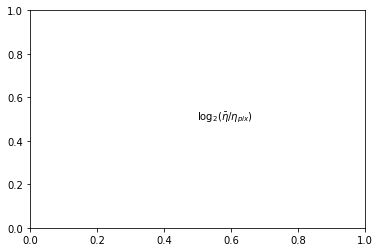

In [94]:
plt.text(0.5,0.5,r'$\log_{2}(\bar\eta/\eta_{pix})$')

### mag-radii functions for TYCHO stars and LSLGA galaxies

In [12]:
#Rongpu's circ radii
rongpuLRG_radii = [[4.0, 210.],[4.5, 210.], [5.5, 200.], [6.25, 150.], [6.75, 125.],
                   [7.25, 120.], [7.75, 110.], [8.25, 100.], [8.75,  75.], [9.25,  60.],
                   [9.75,  55.], [ 10.25,  50.], [ 10.75,  48.], [ 11.25,  40.], [ 11.75,  37.], 
                   [ 12.25,  25.], [ 12.75,  20.], [ 13.25,  18.], [ 13.75,  16.], [ 14.25,  12.], 
                   [ 14.75,  11.], [ 15.25,  11.], [ 15.75,  10.]]

#Rongpu's length radii (diff spikes)
rongpuLRG_length_radii = [[4.0, 600.], [4.5, 600.], [5.5, 600.], [6.25, 540.], [6.75, 520.], [7.25, 500.], 
                   [7.75, 320.], [8.25, 300.], [8.75, 290.], [9.25, 160.], [9.75, 150.], [ 10.25, 140.],
                   [ 10.75, 130.], [ 11.25, 130.], [ 11.75, 100.], [ 12.25, 60.], [ 12.75, 40.], [ 13., 40.]]

#Rongpu's widht radii (diff spikes)
rongpuLRG_widht_radii = [[8., 25.], [13., 16.]]

#kyle_radii's = rongpuLRG_radii's/np.sqrt(2)
kyle_radii = []
for i in range(len(rongpuLRG_radii)):
    kyle_radii.append([rongpuLRG_radii[i][0], rongpuLRG_radii[i][1]/np.sqrt(2)])

kyle_length_radii = []
for i in range(len(rongpuLRG_length_radii)):
    kyle_length_radii.append([rongpuLRG_length_radii[i][0], rongpuLRG_length_radii[i][1]/np.sqrt(2)])

kyle_widht_radii = []
for i in range(len(rongpuLRG_widht_radii)):
    kyle_widht_radii.append([rongpuLRG_widht_radii[i][0], rongpuLRG_widht_radii[i][1]/np.sqrt(2)])
    
#TWOMASS radii
twomass_radii = [[9.5,100], [10.5, 80], [11.5, 70], [12.5, 50], [13.5, 30], 
                 [14.5, 20], [15.5, 10], [16.5, 5]]

#LSLGA radii
LSLGA_radii = [[9.5,100], [10.5, 90], [11.5, 80], [12.5, 70], [13.5, 60], 
               [14.5, 50], [15.5, 35], [16.5, 25], [17.5, 15], [17.5, 10], [18, 8]]

#Dustin_radii's for BS and MS
mag = np.linspace(0, 22, 50)
Dustin_MS_radii = []
for i,j in enumerate(mag):
    Dustin_MS_radii.append([j, np.minimum(1800., 150. * 2.5**((11. - j)/3.)) * 0.262/1])

# TRASH?

In [18]:
from kdcount import correlate
from numpy.testing import assert_almost_equal, assert_allclose, assert_array_less, assert_equal

def test_gal(pos1, pos2, np=0):
    
    #pos = np.array([RA, DEC]).T
    dataset1 = correlate.points(pos1, boxsize=1.0)
    dataset2 = correlate.points(pos2, boxsize=1.0)

    # use the python point point counting
    binning = correlate.RBinning(bins)

    # use the C node node counting
    binning1 = correlate.FastRBinning(bins)

    #start = time.time()
    #r = correlate.paircount(dataset, dataset, binning, np=np)
    #end = time.time()
    #print('Total run time: %f sec' %(end - start))
    
    start = time.time()
    r1 = correlate.paircount(dataset1, dataset2, binning1, np=np)
    end = time.time()
    print('Total run time: %f sec' %(end - start))
    #assert_equal( r.sum1, r1.sum1)
    
    return r1, bins

pos1 = np.array([RA, DEC]).T
pos2 = np.array([rand_RA, rand_DEC]).T
r1, bins2 = test_gal(pos1=pos2, pos2=pos2, np=0)

NameError: name 'RA' is not defined

## Save data into txt and hdf5 files examples

In [19]:
def save_txt(cat, path, filename):
    
    z = np.ones(len(cat['RA']), dtype=int)
    dataset = np.array([cat['RA'], cat['DEC'], z]).T
    
    np.savetxt(path+filename+'.txt', dataset)

In [93]:
import h5py
def save_hdf5(cat, path, filename):

    f = h5py.File(path+filename+'.hdf5', "w")
    z = np.ones(len(cat['RA']), dtype=int)
    print(len(cat), len(z))

    f.create_dataset("Z", data=z, compression="gzip")
    f.create_dataset("RA",  data=cat['RA'],  compression="gzip")
    f.create_dataset("DEC", data=cat['DEC'], compression="gzip")

    f.close()

In [98]:
save_txt(df[(bgs) & (patch)], '/global/homes/q/qmxp55/DESI/cute_test/cute_out/', 
          'cat_test')

In [99]:
save_txt(df_ran[(bgs_ran) & (patch_ran)], '/global/homes/q/qmxp55/DESI/cute_test/cute_out/',
          'cat_test_ran')